https://www.kaggle.com/datasets/kartik2112/fraud-detection

| Column                  | Meaning                     |
| ----------------------- | --------------------------- |
| `trans_date_trans_time` | Transaction timestamp       |
| `cc_num`                | Credit card identifier      |
| `merchant`              | Merchant/store name         |
| `category`              | Transaction category        |
| `amt`                   | Amount of transaction       |
| `first`, `last`         | Cardholder name             |
| `gender`                | Cardholder gender           |
| `street`                | Address street              |
| `city`, `state`, `zip`  | Location of cardholder      |
| `lat`, `long`           | Geographic coordinates      |
| `city_pop`              | Population of city          |
| `job`                   | Job of cardholder           |
| `dob`                   | Cardholder date of birth    |
| `trans_num`             | Transaction ID              |
| `isFraud`               | Target label (fraud vs not) |


isFraud = 0 then it's a legit transaction

isFraud = 1 then it's a fraudlent transaction

In [4]:
import pandas as pd

## **Load Datasets**




In [6]:
#path_1 = "//content/drive/My Drive/Fraud Detection/fraudTrain.csv" 
path_1 = "~/Desktop/Coding projects for fun/Github improvement/fraudTrain.csv"
fraudTrain = pd.read_csv(path_1)
print(fraudTrain.shape)

(1296675, 23)


In [7]:
#path_2 = "//content/drive/My Drive/Fraud Detection/fraudTest.csv" 
path_2 = "~/Desktop/Coding projects for fun/Github improvement/fraudTest.csv"
fraudTest = pd.read_csv(path_2)
print(fraudTest.shape)

(555719, 23)


In [8]:
import numpy as np

**Data Cleaning**

Check for Duplicates

In [11]:
def duplicates(df):
  #print the sums of the duplicated df
  print(f"Number of duplicate rows in the selected dataframe: {df.duplicated().sum()}")
  print(f"Number of na rows in the selected dataframe: {df.isna().sum()}")
duplicates(fraudTrain)
duplicates(fraudTest)

Number of duplicate rows in the selected dataframe: 0
Number of na rows in the selected dataframe: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Number of duplicate rows in the selected dataframe: 0
Number of na rows in the selected dataframe: Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first 

Drop the fraud_ from the merchant column in fraudTrain and fraudTest

In [13]:
def drop_strings(df, col_name, string_to_drop):
    #drop the string in the desired column
    df[col_name] = df[col_name].str.replace(string_to_drop, "")

    return df

drop_strings(fraudTrain, "merchant", "fraud_")
drop_strings(fraudTest, "merchant", "fraud_")

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                              merchant        category     amt    first  \
0                      Kirlin and Sons   personal_care    2.86     Jeff   
1                       Sporer-Keebler   personal_care   29.84   Joanne   
2       Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          Haley Group        misc_pos   60.05    Brian   
4                      Johnston-Casper          travel    3.19   Nathan   
...                                ...             ...     ...      ...   
555714                 Reilly and Sons  health_fitness   43.77  Michael   
555715                  Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       Rau-Robel       kids_pets   86.88      Ann   
555717                 Breitenberg LLC          travel    7.99     Eric   
555718                     Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8ad

# **Investigate columns and ensure dtypes are correct**

Drop the unnecessary column

In [16]:
if 'Unnamed: 0' in fraudTrain.columns:
    fraudTrain = fraudTrain.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0' in fraudTest.columns:
    fraudTest = fraudTest.drop(['Unnamed: 0'], axis=1)

In [17]:
print('Unique states per credit card in fraudTrain:')
print(fraudTrain.groupby('cc_num')['state'].nunique().value_counts().head())

print('\nUnique states per credit card in fraudTest:')
print(fraudTest.groupby('cc_num')['state'].nunique().value_counts().head())

Unique states per credit card in fraudTrain:
state
1    983
Name: count, dtype: int64

Unique states per credit card in fraudTest:
state
1    924
Name: count, dtype: int64


In [18]:
import numpy as np

def add_card_behavioral_features(df):
    df = df.copy()

    df['trans_date_trans_time'] = pd.to_datetime(
        df['trans_date_trans_time'],
        utc=True,
        format='mixed')
    df["dob"] = pd.to_datetime(df["dob"])#UTC is not needed here

    # Encode merchant & state for diversity tracking drop these later
    df['merchant_code'] = df['merchant'].astype('category').cat.codes
    df['state_code'] = df['state'].astype('category').cat.codes

    # Sort for leakage safety to ensure that diff() rolling() expanding() only sees previous transactions, not future ones.
    df = df.sort_values(['cc_num', 'trans_date_trans_time'])

    #Create a column for first transaction
    df['is_first_txn'] = df.groupby('cc_num').cumcount().eq(0).astype(int)

    #Time since last transaction
    df['time_since_last_card_txn'] = (
        df.groupby('cc_num')['trans_date_trans_time']
          .diff()
          .dt.total_seconds()#use seconds so that we don't miss any transacations
          .fillna(-1)) #we use -1 to indicate the init transaction in the data and no previous transaction exists

    #Set timestamp index for rolling windows
    df = df.set_index('trans_date_trans_time')

    # Shift amounts so current transaction is not included
    amt_shifted = df.groupby('cc_num')['amt'].shift(1)#1 makes sure the current tranaction isnt included

    # Card used in specific timeframes features, how many times it was used
    df['card_txn_count_last_1h'] = (
        amt_shifted.groupby(df['cc_num'])
        .rolling('1h')#rolling gets the transactions in the last x amount of time
        .count()#we use count becasue we want the number of previous transactions
        .reset_index(level=0, drop=True)
        .fillna(0))#if the card hasnt been used in x amount of time we fill with 0

    df['card_txn_count_last_24h'] = (
        amt_shifted.groupby(df['cc_num'])
        .rolling('24h')
        .count()
        .reset_index(level=0, drop=True)
        .fillna(0))

    df['card_txn_count_last_7d'] = (
        amt_shifted.groupby(df['cc_num'])
        .rolling('7D')
        .count()
        .reset_index(level=0, drop=True)
        .fillna(0))

    # Spending habits in given time frames with total amount of money spent (1 hour was too small of a time frame to get sum spent)
    df['card_total_spend_last_24h'] = (
        amt_shifted.groupby(df['cc_num'])
        .rolling('24h')
        .sum()#we are looking for the total amount spent
        .reset_index(level=0, drop=True)
        .fillna(0))

    df['card_total_spend_last_7d'] = (
        amt_shifted.groupby(df['cc_num'])
        .rolling('7D')
        .sum()
        .reset_index(level=0, drop=True)
        .fillna(0))

    df['card_avg_amt'] = (
        amt_shifted.groupby(df['cc_num'])
        .expanding()#cumulative average up to current transaction
        .mean()#cumulative average up to current transaction
        .reset_index(level=0, drop=True)
        .fillna(0))#init transaction has no average

    #Diversity features different stores and states that cards were used in
    df['num_unique_merchants_card'] = (
        df.groupby('cc_num')['merchant_code']
        .expanding()
        .apply(lambda x: x.nunique(), raw=False)#returning the amount of unique merchants used on a card
        .reset_index(level=0, drop=True)
        .fillna(0))

    df['num_unique_states_card'] = (
        df.groupby('cc_num')['state_code']
        .expanding()
        .apply(lambda x: x.nunique(), raw=False)#returning the amount of unique states used on a card
        .reset_index(level=0, drop=True)
        .fillna(0))

    df = df.reset_index()
    df.drop(columns=['merchant_code', 'state_code'], inplace=True)

    return df


In [19]:
fraudTrain = add_card_behavioral_features(fraudTrain)

In [20]:
fraudTest = add_card_behavioral_features(fraudTest)

**Nights and weekends**

In [22]:
def add_time_flags_and_drop_timestamp(df, time_col='trans_date_trans_time'):
    df = df.copy()
    #dt.weekday starts with Monday as the beginiing of the week
    df['is_weekend'] = (df[time_col].dt.weekday >= 5).astype(int)
    # off peak hours (10 PM – 6 AM)
    hour = df[time_col].dt.hour
    df['is_night_txn'] = ((hour >= 22) | (hour < 6)).astype(int)

    return df
fraudTrain = add_time_flags_and_drop_timestamp(fraudTrain)
fraudTest = add_time_flags_and_drop_timestamp(fraudTest)

# **Find Details About Habits Based on Job/Income**

In [24]:
def process_job_features_temp(fraudTrain, fraudTest, job_col='job', amount_col='amt', target_col='is_fraud'):
    fraudTrain = fraudTrain.copy()
    fraudTest = fraudTest.copy()
    # Temporary job code for computations (these need to be dropped at the end)
    fraudTrain['_job_code'] = fraudTrain[job_col].astype('category').cat.codes
    fraudTest['_job_code']  = fraudTest[job_col].astype('category').cat.codes

    # Income proxy to simulate spending habits per job. Median is used to give a more stable value than mean would bc of outliers
    job_income_proxy = fraudTrain.groupby('_job_code')[amount_col].median()#median transaction for each job code
    fraudTrain['income_proxy'] = fraudTrain['_job_code'].map(job_income_proxy)#gvies each training row median amount associated with job
    fraudTest['income_proxy']  = fraudTest['_job_code'].map(job_income_proxy)#gvies each training row median amount associated with job
    
    # Target encoding was eventually dropped in the ML process becasue it was found to cause leakage. Leakage went away when it was dropped
    job_target_mean = fraudTrain.groupby('_job_code')[target_col].mean()
    fraudTrain['job_target_enc'] = fraudTrain['_job_code'].map(job_target_mean)
    fraudTest['job_target_enc'] = fraudTest['_job_code'].map(job_target_mean).fillna(fraudTrain[target_col].mean())

    fraudTrain.drop(columns=['_job_code'], inplace=True)
    fraudTest.drop(columns=['_job_code'], inplace=True)

    return fraudTrain, fraudTest
fraudTrain, fraudTest = process_job_features_temp(fraudTrain, fraudTest)


# **Move Our Test Coulmn To The End**

In [26]:
#move is_fraud to the end
def move_col_to_end(df, col_name):
    cols = [c for c in df.columns if c != col_name]
    cols.append(col_name)
    return df[cols]


fraudTrain = move_col_to_end(fraudTrain, 'is_fraud')
fraudTest  = move_col_to_end(fraudTest, 'is_fraud')

In [27]:
fraudTest.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_first_txn', 'time_since_last_card_txn',
       'card_txn_count_last_1h', 'card_txn_count_last_24h',
       'card_txn_count_last_7d', 'card_total_spend_last_24h',
       'card_total_spend_last_7d', 'card_avg_amt', 'num_unique_merchants_card',
       'num_unique_states_card', 'is_weekend', 'is_night_txn', 'income_proxy',
       'job_target_enc', 'is_fraud'],
      dtype='object')

# **Find The Exact Age Of People**

In [29]:
def compute_exact_age(df, dob_col='dob', trans_col='trans_date_trans_time'):
    t = df[trans_col].dt.tz_localize(None)
    b = df[dob_col]
    df['age'] = t.dt.year - b.dt.year -((t.dt.month < b.dt.month) | ((t.dt.month == b.dt.month) & (t.dt.day < b.dt.day)))
#Finds the diff in the years, determines if transaction month is before dob month, 
    # | sets it as T/F and then we find if months are the same and transaction day is before the bday
    return df

fraudTrain = compute_exact_age(fraudTrain)
fraudTest  = compute_exact_age(fraudTest)

**Find what percentage of train and test set have datapoints that are fradualent transactions**

In [31]:
fraudTrain.loc[fraudTrain['is_fraud']==0]

trans_date_trans_time               cc_num  \
0       2019-01-01 12:47:15+00:00          60416207185   
1       2019-01-02 08:44:57+00:00          60416207185   
2       2019-01-02 08:47:36+00:00          60416207185   
3       2019-01-02 12:38:14+00:00          60416207185   
4       2019-01-02 13:10:46+00:00          60416207185   
...                           ...                  ...   
1296670 2020-06-20 21:04:59+00:00  4992346398065154184   
1296671 2020-06-21 00:41:01+00:00  4992346398065154184   
1296672 2020-06-21 02:47:59+00:00  4992346398065154184   
1296673 2020-06-21 08:04:28+00:00  4992346398065154184   
1296674 2020-06-21 09:58:58+00:00  4992346398065154184   

                            merchant       category     amt     first  last  \
0        Jones, Sawayn and Romaguera       misc_net    7.27      Mary  Diaz   
1                          Berge LLC  gas_transport   52.94      Mary  Diaz   
2                       Luettgen PLC  gas_transport   82.08      Mary  Diaz   
3                      Daugherty LLC      kids_pets   34.79      Mary  Diaz   
4                     Beier and Sons           home   27.18      Mary  Diaz   
...                              ...            ...     ...       ...   ...   
1296670    Berge, Kautzer and Harris  personal_care   60.47  Benjamin   Kim   
1296671                 Bernhard Inc  gas_transport   74.29  Benjamin   Kim   
1296672      Reichert, Rowe and Mraz   shopping_net  246.56  Benjamin   Kim   
1296673                   Jewess LLC   shopping_pos    2.62  Benjamin   Kim   
1296674      Reilly, Heaney and Cole  gas_transport   39.29  Benjamin   Kim   

        gender             street           city  ...  \
0            F   9886 Anita Drive  Fort Washakie  ...   
1            F   9886 Anita Drive  Fort Washakie  ...   
2            F   9886 Anita Drive  Fort Washakie  ...   
3            F   9886 Anita Drive  Fort Washakie  ...   
4            F   9886 Anita Drive  Fort Washakie  ...   
...        ...                ...            ...  ...   
1296670      M  920 Patrick Light        Mc Nabb  ...   
1296671      M  920 Patrick Light        Mc Nabb  ...   
1296672      M  920 Patrick Light        Mc Nabb  ...   
1296673      M  920 Patrick Light        Mc Nabb  ...   
1296674      M  920 Patrick Light        Mc Nabb  ...   

        card_total_spend_last_7d  card_avg_amt  num_unique_merchants_card  \
0                           0.00      0.000000                        1.0   
1                           7.27      7.270000                        2.0   
2                          60.21     30.105000                        3.0   
3                         142.29     47.430000                        4.0   
4                         177.08     44.270000                        5.0   
...                          ...           ...                        ...   
1296670                  1425.82     67.802931                      621.0   
1296671                  1486.29     67.799363                      621.0   
1296672                  1560.58     67.802519                      621.0   
1296673                  1657.83     67.889421                      621.0   
1296674                  1660.45     67.857707                      621.0   

         num_unique_states_card  is_weekend is_night_txn income_proxy  \
0                           1.0           0            0       50.600   
1                           1.0           0            0       50.600   
2                           1.0           0            0       50.600   
3                           1.0           0            0       50.600   
4                           1.0           0            0       50.600   
...                         ...         ...          ...          ...   
1296670                     1.0           1            0       49.315   
1296671                     1.0           1            1       49.315   
1296672                     1.0           1            1       49.315   
1296673                   

In [32]:
fraudTest.loc[fraudTest['is_fraud']==0]

trans_date_trans_time               cc_num  \
0      2020-06-21 13:05:42+00:00          60416207185   
1      2020-06-21 16:25:36+00:00          60416207185   
2      2020-06-22 07:58:33+00:00          60416207185   
3      2020-06-22 15:32:31+00:00          60416207185   
4      2020-06-23 12:28:54+00:00          60416207185   
...                          ...                  ...   
555714 2020-12-31 02:10:10+00:00  4992346398065154184   
555715 2020-12-31 05:13:35+00:00  4992346398065154184   
555716 2020-12-31 11:15:44+00:00  4992346398065154184   
555717 2020-12-31 11:17:25+00:00  4992346398065154184   
555718 2020-12-31 13:24:36+00:00  4992346398065154184   

                              merchant       category     amt     first  last  \
0                          Kutch-Ferry           home  124.66      Mary  Diaz   
1                      Halvorson Group       misc_pos   78.52      Mary  Diaz   
2                   Conroy-Cruickshank  gas_transport   65.25      Mary  Diaz   
3                           Larkin Ltd      kids_pets   87.74      Mary  Diaz   
4                      Leffler-Goldner  personal_care  148.02      Mary  Diaz   
...                                ...            ...     ...       ...   ...   
555714               Parisian and Sons  gas_transport   66.11  Benjamin   Kim   
555715               Bogisich-Homenick       misc_net    4.58  Benjamin   Kim   
555716                Erdman-Kertzmann  gas_transport   95.96  Benjamin   Kim   
555717                   Stracke-Lemke    grocery_pos  149.48  Benjamin   Kim   
555718  Roberts, Daniel and Macejkovic      kids_pets   20.55  Benjamin   Kim   

       gender             street           city  ... card_total_spend_last_7d  \
0           F   9886 Anita Drive  Fort Washakie  ...                     0.00   
1           F   9886 Anita Drive  Fort Washakie  ...                   124.66   
2           F   9886 Anita Drive  Fort Washakie  ...                   203.18   
3           F   9886 Anita Drive  Fort Washakie  ...                   268.43   
4           F   9886 Anita Drive  Fort Washakie  ...                   356.17   
...       ...                ...            ...  ...                      ...   
555714      M  920 Patrick Light        Mc Nabb  ...                  4577.40   
555715      M  920 Patrick Light        Mc Nabb  ...                  4634.41   
555716      M  920 Patrick Light        Mc Nabb  ...                  4638.99   
555717      M  920 Patrick Light        Mc Nabb  ...                  4734.95   
555718      M  920 Patrick Light        Mc Nabb  ...                  4884.43   

        card_avg_amt  num_unique_merchants_card  num_unique_states_card  \
0           0.000000                        1.0                     1.0   
1         124.660000                        2.0                     1.0   
2         101.590000                        3.0                     1.0   
3          89.476667                        4.0                     1.0   
4          89.042500                        5.0                     1.0   
...              ...                        ...                     ...   
555714     63.120536                      451.0                     1.0   
555715     63.124016                      452.0                     1.0   
555716     63.055942                      452.0                     1.0   
555717     63.094158                      453.0                     1.0   
555718     63.194374                      454.0                     1.0   

        is_weekend is_night_txn income_proxy job_target_enc  is_fraud  age  
0                1            0        45.44       0.000000         0   34  
1                1            0        45.44       0.000000         0   34  
2                0            0        45.44       0.000000         0   34  
3                0            0        45.44       0.000000         0   34  
4                0            0        45.44       0.000000         0   34  
...            ..

In [33]:
print(f'{(7506/1296675)*100:.2f}% of the fraudTrain datapoints are fraud transactions')
print(f'{(2145/555719)*100:.2f}% of the fraudTest datapoints are fraud transactions')

0.58% of the fraudTrain datapoints are fraud transactions
0.39% of the fraudTest datapoints are fraud transactions


# **merch_lat and merch_long need to become tangable locations**

In [35]:
import reverse_geocoder as rg

def add_city_from_coords(df, lat_col='merch_lat', long_col='merch_long', city_col='merch_city'):

    # Get unique coordinates
    unique_coords = df[[lat_col, long_col]].drop_duplicates()
    coords_list = list(zip(unique_coords[lat_col], unique_coords[long_col]))#zip the coords so rg.search can find the locations
    results = rg.search(coords_list)  # returns list of dicts w coords

    #DataFrame w/ city names so it can be merged into df (fraudTrain and fraudTest)
    geo_df = pd.DataFrame({
        lat_col: unique_coords[lat_col].values,
        long_col: unique_coords[long_col].values,
        city_col: [r['name'] for r in results]})

    # Merge geo_df and df (fraudTrain and fraudTest)
    df = df.merge(
        geo_df,
        on=[lat_col, long_col],
        how='left')

    return df
fraudTrain = add_city_from_coords(fraudTrain)
fraudTest = add_city_from_coords(fraudTest)

Loading formatted geocoded file...


## **Get the mile difference between the different long/lat**

In [37]:
#sine converts angular differences into arc distances
#cosine adjusts for shrinking longitude lines as you move away from the equator
def haversine_vectorized(lat1, lon1, lat2, lon2):
    # Convert degrees to radians 
    # Trig functions require radians, not degrees
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    #difference in latitude between the two points
    dlat = lat2 - lat1
    #difference in longitude between the two points
    dlon = lon2 - lon1 
  
    #calculates the squared half chord length between the two points It combines latitude change and longitude change
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2 
    # Converts the value above into the central angle between the two points on the sphere 
    #arcsin converts the linear half chord distance between two points on a sphere into the central angle, 
            #which can then be multiplied by Earth’s radius to get the surface distance
    c = 2 * np.arcsin(np.sqrt(a))

    r = 3958.8  # Radius of Earth
    return c * r

#miles apart for fraudTrain
fraudTrain['miles_apart'] = haversine_vectorized(fraudTrain['lat'], fraudTrain['long'],fraudTrain['merch_lat'],
                                                 fraudTrain['merch_long'])

#miles apart for fraudTest
fraudTest['miles_apart'] = haversine_vectorized(fraudTest['lat'], fraudTest['long'],fraudTest['merch_lat'],
                                                fraudTest['merch_long'])

In [38]:
fraudTrain = move_col_to_end(fraudTrain, 'is_fraud')
fraudTest  = move_col_to_end(fraudTest, 'is_fraud')

In [39]:
fraudTrain = fraudTrain.rename(columns={'merch_city_x':'merch_city'})
fraudTest = fraudTest.rename(columns={'merch_city_x':'merch_city'})

combine fraudTrain and fraudTest ONLY for EDA purposes. Use seperate fraudTrain and fraudTest for ML modeling

In [41]:
EDA_df = pd.concat([fraudTrain, fraudTest], axis=0)

**Exploratory Data Analysis**

Are there any major differences in the train and test datasets?

In [44]:
fraudTrain.describe().round(2)

cc_num         amt         zip         lat        long  \
count  1.296675e+06  1296675.00  1296675.00  1296675.00  1296675.00   
mean   4.171920e+17       70.35    48800.67       38.54      -90.23   
min    6.041621e+10        1.00     1257.00       20.03     -165.67   
25%    1.800429e+14        9.65    26237.00       34.62      -96.80   
50%    3.521417e+15       47.52    48174.00       39.35      -87.48   
75%    4.642255e+15       83.14    72042.00       41.94      -80.16   
max    4.992346e+18    28948.90    99783.00       66.69      -67.95   
std    1.308806e+18      160.32    26893.22        5.08       13.76   

         city_pop                            dob     unix_time   merch_lat  \
count  1296675.00                        1296675  1.296675e+06  1296675.00   
mean     88824.44  1973-10-03 19:02:55.017178560  1.349244e+09       38.54   
min         23.00            1924-10-30 00:00:00  1.325376e+09       19.03   
25%        743.00            1962-08-13 00:00:00  1.338751e+09       34.73   
50%       2456.00            1975-11-30 00:00:00  1.349250e+09       39.37   
75%      20328.00            1987-02-22 00:00:00  1.359385e+09       41.96   
max    2906700.00            2005-01-29 00:00:00  1.371817e+09       67.51   
std     301956.36                            NaN  1.284128e+07        5.11   

       merch_long  ...  card_avg_amt  num_unique_merchants_card  \
count  1296675.00  ...    1296675.00                 1296675.00   
mean       -90.23  ...         70.34                     406.48   
min       -166.67  ...          0.00                       1.00   
25%        -96.90  ...         58.00                     270.00   
50%        -87.44  ...         65.03                     445.00   
75%        -80.24  ...         83.83                     562.00   
max        -66.95  ...       1433.54                     678.00   
std         13.77  ...         21.15                     181.13   

       num_unique_states_card  is_weekend  is_night_txn  income_proxy  \
count               1296675.0  1296675.00    1296675.00    1296675.00   
mean                      1.0        0.35          0.30         46.27   
min                       1.0        0.00          0.00         22.33   
25%                       1.0        0.00          0.00         38.30   
50%                       1.0        0.00          0.00         43.57   
75%                       1.0        1.00          1.00         51.83   
max                       1.0        1.00          1.00        949.44   
std                       0.0        0.48          0.46         13.79   

       job_target_enc        age  miles_apart    is_fraud  
count      1296675.00  1296675.0   1296675.00  1296675.00  
mean             0.01       45.5        47.30        0.01  
min              0.00       13.0         0.01        0.00  
25%              0.00       32.0        34.38        0.00  
50%              0.01       43.0        48.61        0.00  
75%              0.01       57.0        61.21        0.00  
max              1.00       95.0        94.52        1.00  
std              0.01       17.4        18.09        0.08  

[8 rows x 27 columns]

In [45]:
fraudTest.describe().round(2)

cc_num        amt        zip        lat       long    city_pop  \
count  5.557190e+05  555719.00  555719.00  555719.00  555719.00   555719.00   
mean   4.178387e+17      69.39   48842.63      38.54     -90.23    88221.89   
min    6.041621e+10       1.00    1257.00      20.03    -165.67       23.00   
25%    1.800429e+14       9.63   26292.00      34.67     -96.80      741.00   
50%    3.521417e+15      47.29   48174.00      39.37     -87.48     2408.00   
75%    4.635331e+15      83.01   72011.00      41.89     -80.18    19685.00   
max    4.992346e+18   22768.11   99921.00      65.69     -67.95  2906700.00   
std    1.309837e+18     156.75   26855.28       5.06      13.72   300390.89   

                                 dob     unix_time  merch_lat  merch_long  \
count                         555719  5.557190e+05  555719.00   555719.00   
mean   1973-11-11 16:30:05.937173296  1.380679e+09      38.54      -90.23   
min              1924-10-30 00:00:00  1.371817e+09      19.03     -166.67   
25%              1962-09-27 00:00:00  1.376029e+09      34.76      -96.91   
50%              1975-11-30 00:00:00  1.380762e+09      39.38      -87.45   
75%              1987-04-23 00:00:00  1.385867e+09      41.95      -80.26   
max              2005-01-29 00:00:00  1.388534e+09      66.68      -66.95   
std                              NaN  5.201104e+06       5.10       13.73   

       ...  card_avg_amt  num_unique_merchants_card  num_unique_states_card  \
count  ...     555719.00                  555719.00                555719.0   
mean   ...         69.20                     257.58                     1.0   
min    ...          0.00                       1.00                     1.0   
25%    ...         55.77                     136.00                     1.0   
50%    ...         64.00                     257.00                     1.0   
75%    ...         82.40                     376.00                     1.0   
max    ...       2271.66                     589.00                     1.0   
std    ...         23.30                     146.13                     0.0   

       is_weekend  is_night_txn  income_proxy  job_target_enc        age  \
count   555719.00     555719.00     555719.00       555719.00  555719.00   
mean         0.28          0.30         66.10            0.04      46.39   
min          0.00          0.00         22.33            0.00      15.00   
25%          0.00          0.00         37.94            0.00      33.00   
50%          0.00          0.00         44.74            0.01      44.00   
75%          1.00          1.00         53.40            0.01      58.00   
max          1.00          1.00        949.44            1.00      96.00   
std          0.45          0.46        113.20            0.19      17.43   

       miles_apart   is_fraud  
count    555719.00  555719.00  
mean         47.29       0.00  
min           0.08       0.00  
25%          34.35       0.00  
50%          48.58       0.00  
75%          61.22       0.00  
max          93.78       1.00  
std          18.09       0.06  

[8 rows x 27 columns]

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Separate EDA_df into fraud and non fraud

In [48]:
EDA_df_fraud = EDA_df[EDA_df['is_fraud']==1]
EDA_df_non_fraud = EDA_df[EDA_df['is_fraud']==0]

In [49]:
def plot_boxplot(df, col_name, figsize=(8,5), title=None, orient='h', color='skyblue'):

    plt.figure(figsize=figsize)
    sns.boxplot(
        x=df[col_name] if orient=='h' else None,
        y=df[col_name] if orient=='v' else None,
        orient=orient,
        color=color)
    if title:
        plt.title(title)
    else:
        plt.title(f"Boxplot of {col_name}")

    plt.xlabel(col_name if orient=='h' else "")
    plt.ylabel(col_name if orient=='v' else "")
    plt.show()


In [50]:
EDA_df_fraud['amt_binned'] = pd.cut(EDA_df_fraud['amt'], bins=10)
print("Columns in EDA_df_fraud after binning:")
print(EDA_df_fraud.columns)
print("\nValue counts for 'amt_binned':")
print(EDA_df_fraud['amt_binned'].value_counts().sort_index())

Columns in EDA_df_fraud after binning:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_first_txn', 'time_since_last_card_txn',
       'card_txn_count_last_1h', 'card_txn_count_last_24h',
       'card_txn_count_last_7d', 'card_total_spend_last_24h',
       'card_total_spend_last_7d', 'card_avg_amt', 'num_unique_merchants_card',
       'num_unique_states_card', 'is_weekend', 'is_night_txn', 'income_proxy',
       'job_target_enc', 'age', 'merch_city', 'miles_apart', 'is_fraud',
       'amt_binned'],
      dtype='object')

Value counts for 'amt_binned':
amt_binned
(-0.315, 138.558]       2310
(138.558, 276.056]       383
(276.056, 413.554]      2159
(413.554, 551.052]       179
(551.052, 688.55]        229
(688.55, 826.048]       1125
(826.048, 963.546]      1585
(963.546, 1101.044]     

/var/folders/9s/jwyj784906ndy4td5h3gqtnw0000gn/T/ipykernel_2765/910969676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA_df_fraud['amt_binned'] = pd.cut(EDA_df_fraud['amt'], bins=10)


**Amount spent in Fraudulent Transactions**

In [52]:
def barplot(df=EDA_df_fraud, col_name='amt', figsize=(12,8), title=None, color='skyblue'):
  plt.figure(figsize=figsize)
  x_labels = [str(interval) for interval in df[col_name].value_counts().index]
  bar = plt.bar(x_labels, df[col_name].value_counts().values, color=color)
  for b in bar:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width() / 2,
            height + 0.5,
            str(int(height)),
            ha='center',
            va='top',
            fontsize=10,
            rotation=0,
            rotation_mode='anchor')
  plt.xlabel(col_name)
  plt.ylabel('Count')
  if title:
    plt.title(title)
  else:
    plt.title(f"Barplot of {col_name}")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

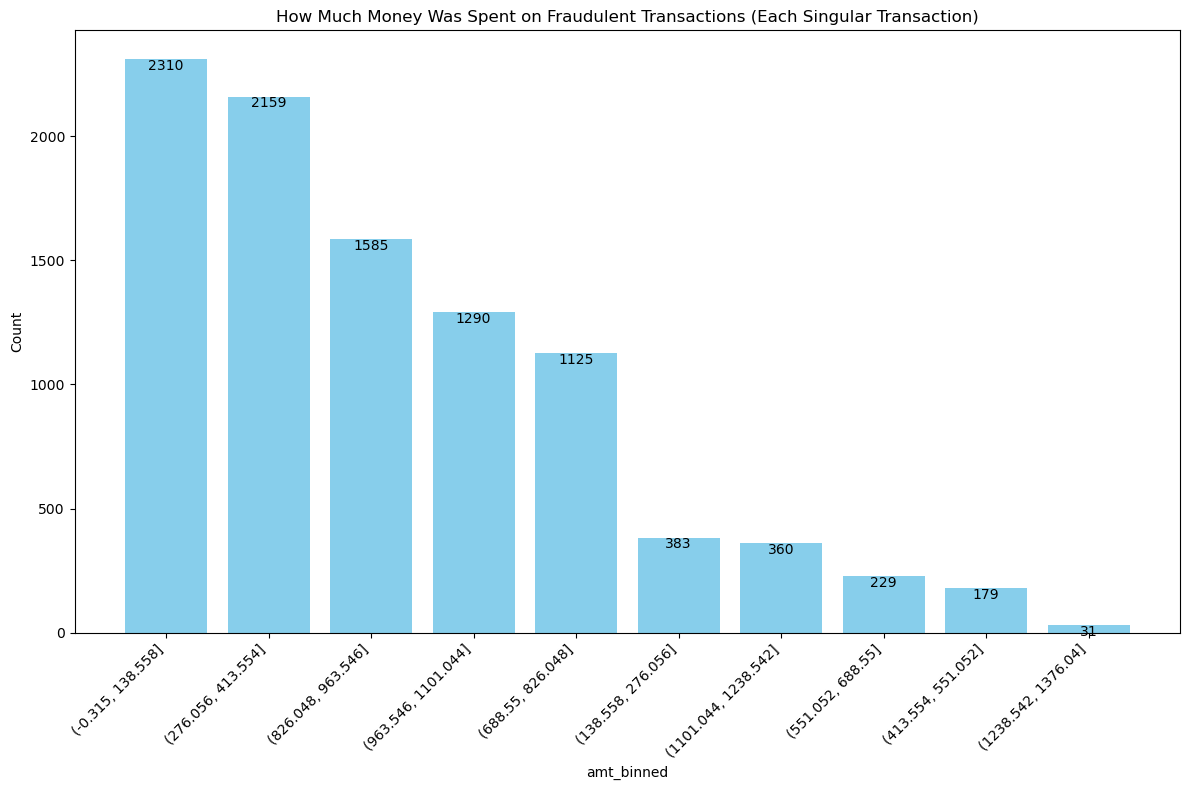

In [53]:
barplot(EDA_df_fraud,'amt_binned',figsize=(12,8), title='How Much Money Was Spent on Fraudulent Transactions (Each Singular Transaction)')

**Age of Fraud Victims**

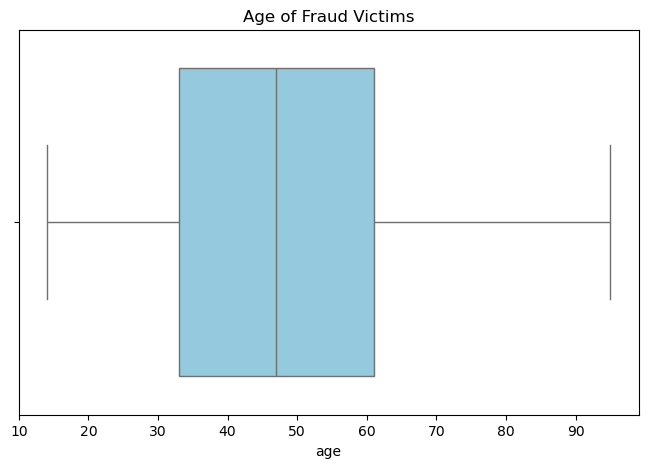

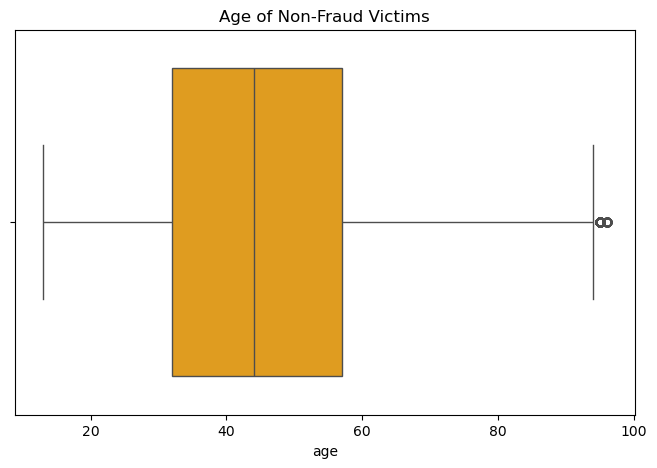

In [55]:
plot_boxplot(EDA_df_fraud, 'age', color='skyblue', title='Age of Fraud Victims')
plot_boxplot(EDA_df_non_fraud, 'age', color='orange', title='Age of Non-Fraud Victims')

In [56]:
fraud_stores = (EDA_df_fraud
    .groupby('merchant').agg(fraud_count=('amt', 'count'),total_loss=('amt', 'sum')).sort_values(by='total_loss', ascending=False))

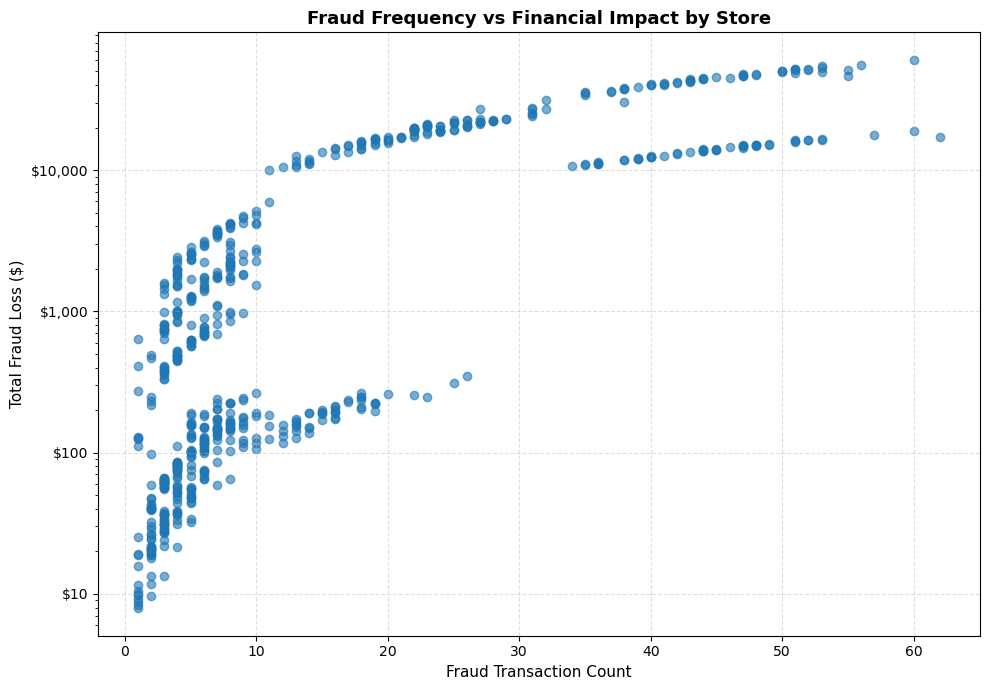

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(
    fraud_stores['fraud_count'],
    fraud_stores['total_loss'],
    alpha=0.6)
plt.xlabel('Fraud Transaction Count', fontsize=11)
plt.ylabel('Total Fraud Loss ($)', fontsize=11)
plt.title('Fraud Frequency vs Financial Impact by Store', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()


In [58]:
top_ten_fraud_stores = fraud_stores.head(10)
top_ten_merchants = top_ten_fraud_stores.index.tolist()

In [59]:
top_ten_merchants_df = EDA_df[EDA_df['merchant'].isin(top_ten_merchants)]

In [60]:
fraud_counts = EDA_df_fraud['merchant'].value_counts()
merchant_counts = top_ten_merchants_df['merchant'].value_counts()

In [61]:
merchants_graph1 = set(merchant_counts.index)
top10_fraud = fraud_counts.head(10)
merchants_graph2 = set(top10_fraud.index)

common_merchants = merchants_graph1.intersection(merchants_graph2)

if common_merchants:
    print(f"The following merchants appear in both graphs: {list(common_merchants)}")
else:
    print("There are no common merchants in the two graphs.")

The following merchants appear in both graphs: ['Kozey-Boehm', 'Boyer PLC', 'Terry-Huel', 'Kuhic LLC']


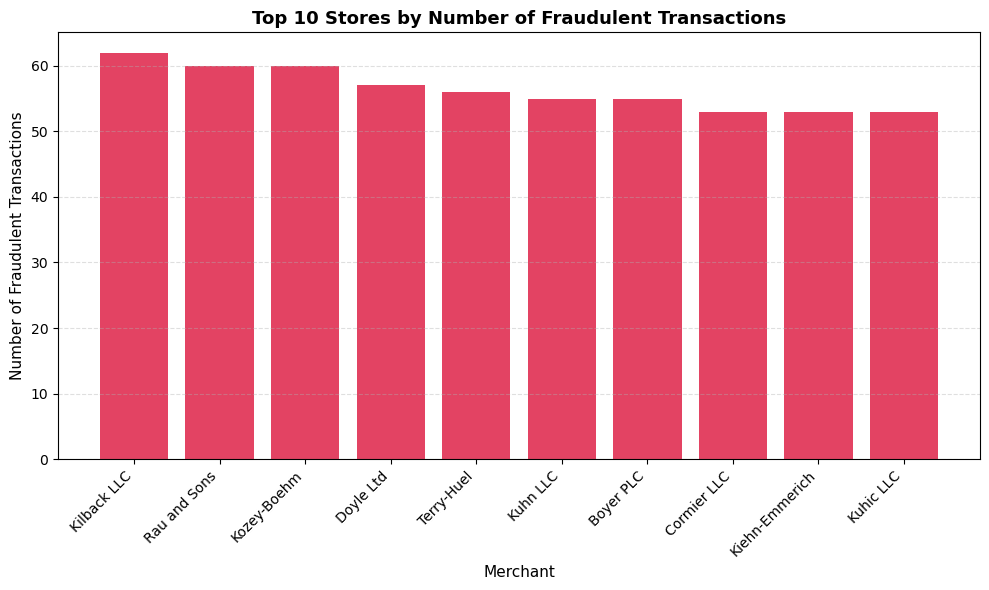

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(top10_fraud.index, top10_fraud.values, color='crimson', alpha=0.8)

plt.xlabel('Merchant', fontsize=11)
plt.ylabel('Number of Fraudulent Transactions', fontsize=11)
plt.title('Top 10 Stores by Number of Fraudulent Transactions', fontsize=13, fontweight='bold')


plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Are there any people who repeat in the dataset?**

In [64]:
fraud_per_person = EDA_df_fraud['cc_num'].value_counts().loc[lambda x: x > 1]

In [65]:
print(f'There are {len(fraud_per_person)} people who are victims of fruad with multiple transactions')

There are 976 people who are victims of fruad with multiple transactions


**How much money are these people who have been victims of multiple transactions losing**

In [67]:
#Get credit card numbers that occur more than once and the amount of money they lost
amount_lost = EDA_df_fraud[['cc_num','amt']].groupby('cc_num').filter(lambda x: len(x) > 1)
amount_lost_by_card = amount_lost.groupby('cc_num').sum().sort_values(by='amt', ascending=False)

# Combine total amount lost with the count of fraudulent transactions per card
amount_lost_by_card = amount_lost_by_card.merge(fraud_per_person.rename('fraud_count'),
                                                left_index=True, right_index=True, how='left')


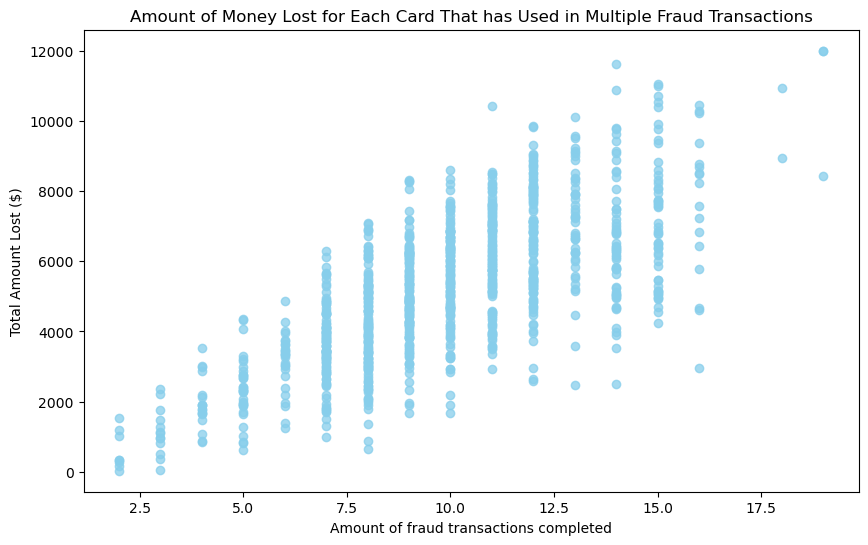

In [68]:
#create a scatter plot to show the amount of money lost for each card that has used in multiple fraud transactions
plt.figure(figsize = (10, 6))
plt.scatter(amount_lost_by_card['fraud_count'], amount_lost_by_card['amt'], alpha = 0.75,color ='skyblue') 
plt.title("Amount of Money Lost for Each Card That has Used in Multiple Fraud Transactions")
plt.xlabel('Amount of fraud transactions completed')
plt.ylabel('Total Amount Lost ($)')
plt.show()

Let's see what jobs were most commonly used in fraud cases

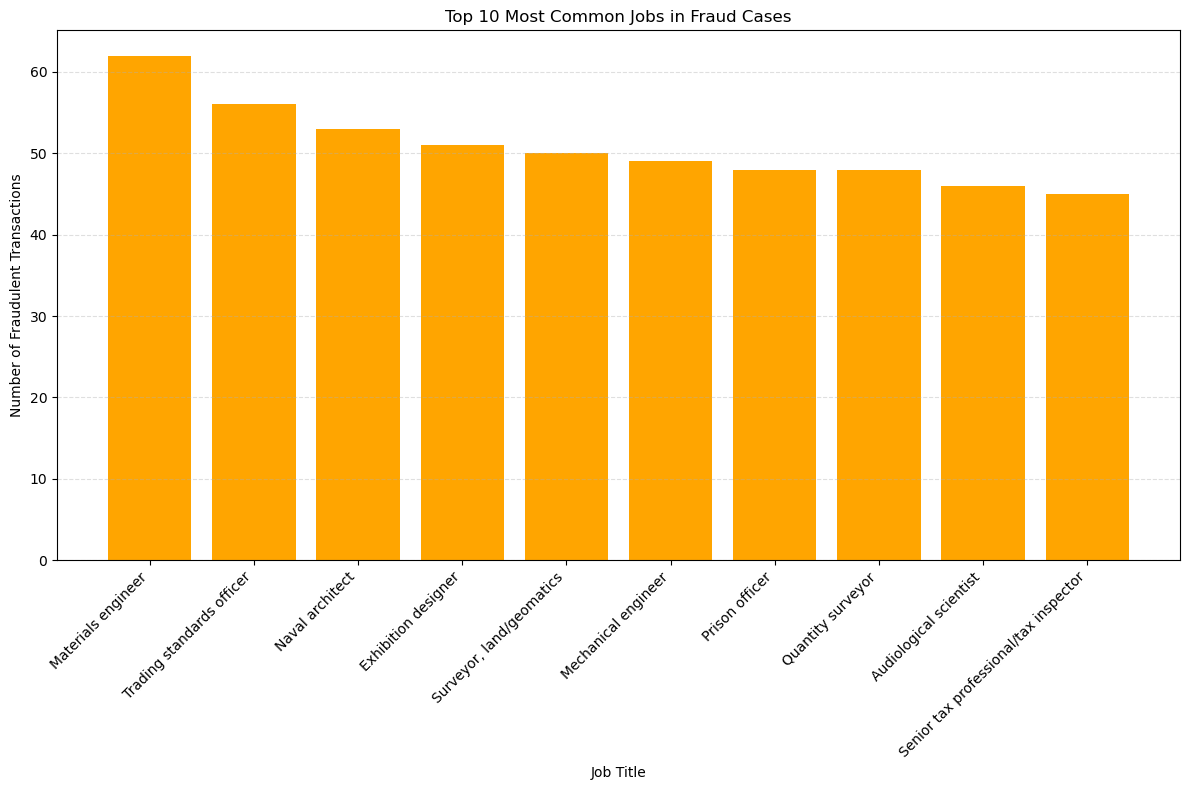

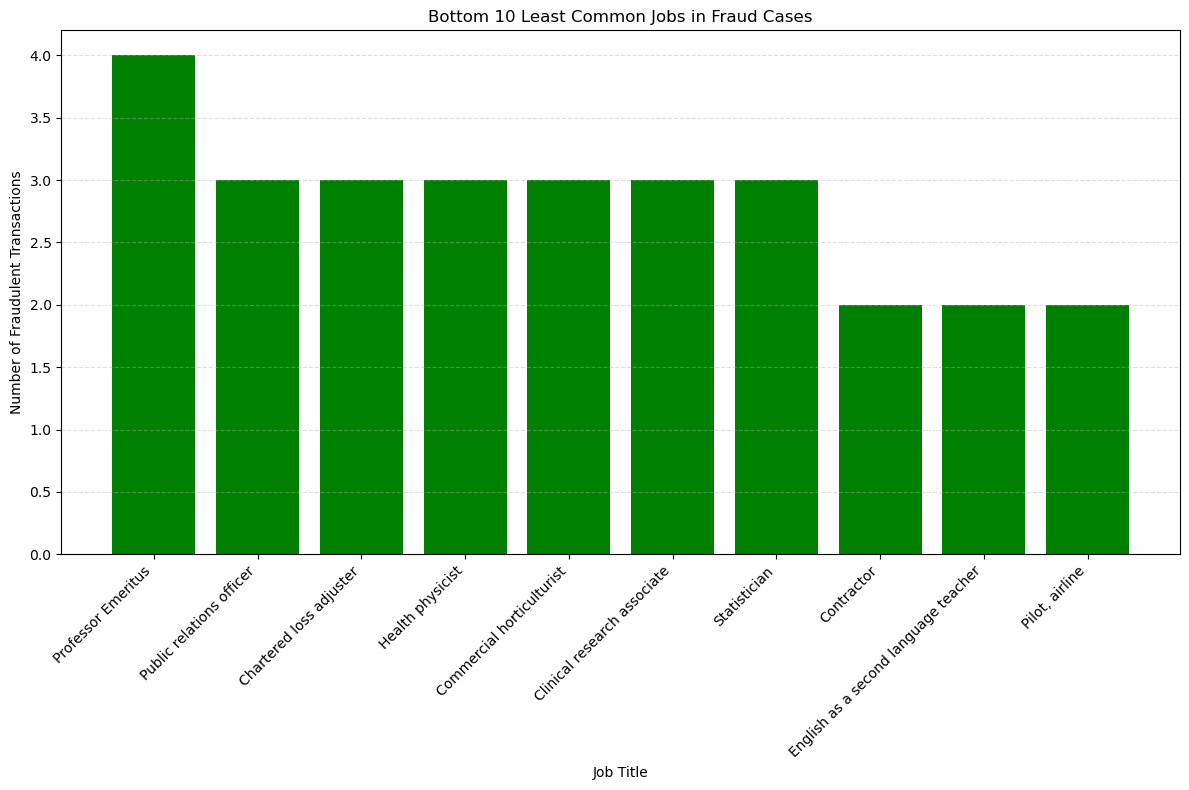

In [70]:
fraud_job_metrics = EDA_df_fraud[['job','income_proxy','job_target_enc']].value_counts(ascending=False)
def plot_fraud_jobs(fraud_job_metrics,n=10,which='top',figsize=(12, 8)):
    if which == 'top':
        data = fraud_job_metrics.head(n)
        color = 'orange'
        title = f'Top {n} Most Common Jobs in Fraud Cases'
    elif which == 'bottom':
        data = fraud_job_metrics.tail(n)
        color = 'green'
        title = f'Bottom {n} Least Common Jobs in Fraud Cases'
    else:
        raise ValueError("which must be 'top' or 'bottom'")
    plt.figure(figsize=figsize)
    plt.bar(x=data.index.get_level_values('job'),height=data.values,color=color)
    plt.xlabel('Job Title')
    plt.ylabel('Number of Fraudulent Transactions')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
plot_fraud_jobs(fraud_job_metrics, n=10, which='top')
plot_fraud_jobs(fraud_job_metrics, n=10, which='bottom')

# **Drop Any Unnecessary Columns**

In [72]:
def cols_to_drop(df):
  df.drop(columns=['first', 'last','unix_time','dob','gender','city','street','long','lat','trans_num','job'],inplace = True)
  return df
cols_to_drop(fraudTrain)
cols_to_drop(fraudTest)

trans_date_trans_time               cc_num  \
0      2020-06-21 13:05:42+00:00          60416207185   
1      2020-06-21 16:25:36+00:00          60416207185   
2      2020-06-22 07:58:33+00:00          60416207185   
3      2020-06-22 15:32:31+00:00          60416207185   
4      2020-06-23 12:28:54+00:00          60416207185   
...                          ...                  ...   
555714 2020-12-31 02:10:10+00:00  4992346398065154184   
555715 2020-12-31 05:13:35+00:00  4992346398065154184   
555716 2020-12-31 11:15:44+00:00  4992346398065154184   
555717 2020-12-31 11:17:25+00:00  4992346398065154184   
555718 2020-12-31 13:24:36+00:00  4992346398065154184   

                              merchant       category     amt state    zip  \
0                          Kutch-Ferry           home  124.66    WY  82514   
1                      Halvorson Group       misc_pos   78.52    WY  82514   
2                   Conroy-Cruickshank  gas_transport   65.25    WY  82514   
3                           Larkin Ltd      kids_pets   87.74    WY  82514   
4                      Leffler-Goldner  personal_care  148.02    WY  82514   
...                                ...            ...     ...   ...    ...   
555714               Parisian and Sons  gas_transport   66.11    IL  61335   
555715               Bogisich-Homenick       misc_net    4.58    IL  61335   
555716                Erdman-Kertzmann  gas_transport   95.96    IL  61335   
555717                   Stracke-Lemke    grocery_pos  149.48    IL  61335   
555718  Roberts, Daniel and Macejkovic      kids_pets   20.55    IL  61335   

        city_pop  merch_lat  merch_long  ...  num_unique_merchants_card  \
0           1645  42.945526 -108.530901  ...                        1.0   
1           1645  42.193130 -108.682054  ...                        2.0   
2           1645  43.932724 -109.699794  ...                        3.0   
3           1645  43.546064 -109.212939  ...                        4.0   
4           1645  42.876538 -109.333220  ...                        5.0   
...          ...        ...         ...  ...                        ...   
555714       532  40.915589  -88.806426  ...                      451.0   
555715       532  40.637488  -89.880600  ...                      452.0   
555716       532  40.869708  -89.066993  ...                      452.0   
555717       532  41.437224  -90.132253  ...                      453.0   
555718       532  41.313939  -89.032702  ...                      454.0   

        num_unique_states_card  is_weekend  is_night_txn  income_proxy  \
0                          1.0           1             0         45.44   
1                          1.0           1             0         45.44   
2                          1.0           0             0         45.44   
3                          1.0           0             0         45.44   
4                          1.0           0             0         45.44   
...                        ...         ...           ...           ...   
555714                     1.0           0             1         54.02   
555715                     1.0           0             1         54.02   
555716                     1.0           0             0         54.02   
555717                     1.0           0             0         54.02   
555718                     1.0           0             0         54.02   

        job_target_enc  age     merch_city  miles_apart  is_fraud  
0             0.000000   34       Arapahoe    18.925371         0  
1             0.000000   34         Lander    57.131328         0  
2             0.000000   34           Cody    75.719535         0  
3             0.000000   34  Fort Washakie    40.646930         0  
4             0.000000   34  Fort Washakie    23.805787         0  
...                ...  ...            ...          ...       ...  
555714        0.021195   64       Flanagan    27.890584         0  
555715        0.021195   64       Glasford    50.633565

In [73]:
fraudTrain.drop(columns =['job_target_enc','merch_lat','merch_long','city_pop','state','cc_num','zip','merchant',
                          'num_unique_states_card','merch_city','category','trans_date_trans_time'], inplace=True)
fraudTest.drop(columns =['job_target_enc','merch_lat','merch_long','city_pop','state','cc_num','zip','merchant',
                         'num_unique_states_card','merch_city','category','trans_date_trans_time'], inplace=True)

**Machine Learning**

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [76]:
X_train = fraudTrain.drop(columns=['is_fraud'])
y_train = fraudTrain['is_fraud']
X_test = fraudTest.drop(columns=['is_fraud'])
y_test = fraudTest['is_fraud']
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1296675, 15)
Shape of y_train: (1296675,)
Shape of X_test: (555719, 15)
Shape of y_test: (555719,)


**Decision Trees**

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Training Classification Report (threshold =0.9 ):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1289169
           1       0.35      0.89      0.51      7506

    accuracy                           0.99   1296675
   macro avg       0.68      0.94      0.75   1296675
weighted avg       1.00      0.99      0.99   1296675

Test Classification Report (threshold = 0.9):

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.27      0.86      0.41      2145

    accuracy                           0.99    555719
   macro avg       0.63      0.93      0.70    555719
weighted avg       1.00      0.99      0.99    555719



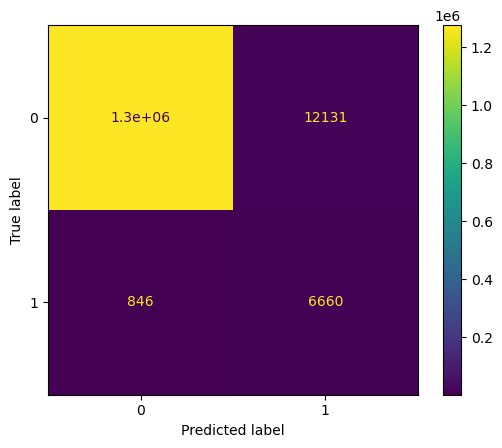

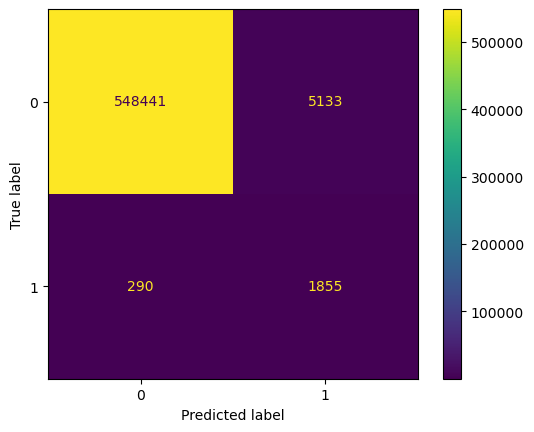

In [79]:
d_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=500,
    min_samples_split=100,
    class_weight='balanced',
    random_state=42) 
#d_tree = DecisionTreeClassifier(
    #criterion='entropy', Splitting criterion; 'entropy' measures information gain
    #max_depth=7,maximum depth of the tree
    #min_samples_leaf=500,minimum samples needed in each "leaf"
    #min_samples_split=100,minimum amount of samples needed in a "leaf" for the tree to move on to a new depth layer
   # class_weight='balanced',Adjusts weights inversely proportional to class frequencies for imbalanced datasets
    #random_state=42 ensures reproducibility)

d_tree.fit(X_train, y_train)

# Predict probabilities of fraud
y_proba_train = d_tree.predict_proba(X_train)[:, 1] #[:, 1]selects probability of the fraud class (1).
y_proba_test = d_tree.predict_proba(X_test)[:, 1]

# Apply threshold 
threshold = 0.9 #has to be a proability of fraud of at least 90% for a transaction to be considered fraudulent.  
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

# Confusion Matrix (training data only) ---
cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=d_tree.classes_)
disp.plot()

#Classification Report (Ttraining data only) ---
print(f"Training Classification Report (threshold ={threshold} ):\n")
print(classification_report(y_train, y_pred_train))

#Confusion matrix and classificaiton report for testing data
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=d_tree.classes_)
disp.plot()

#Classification Report (test data only)
print(f"Test Classification Report (threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_test)) 

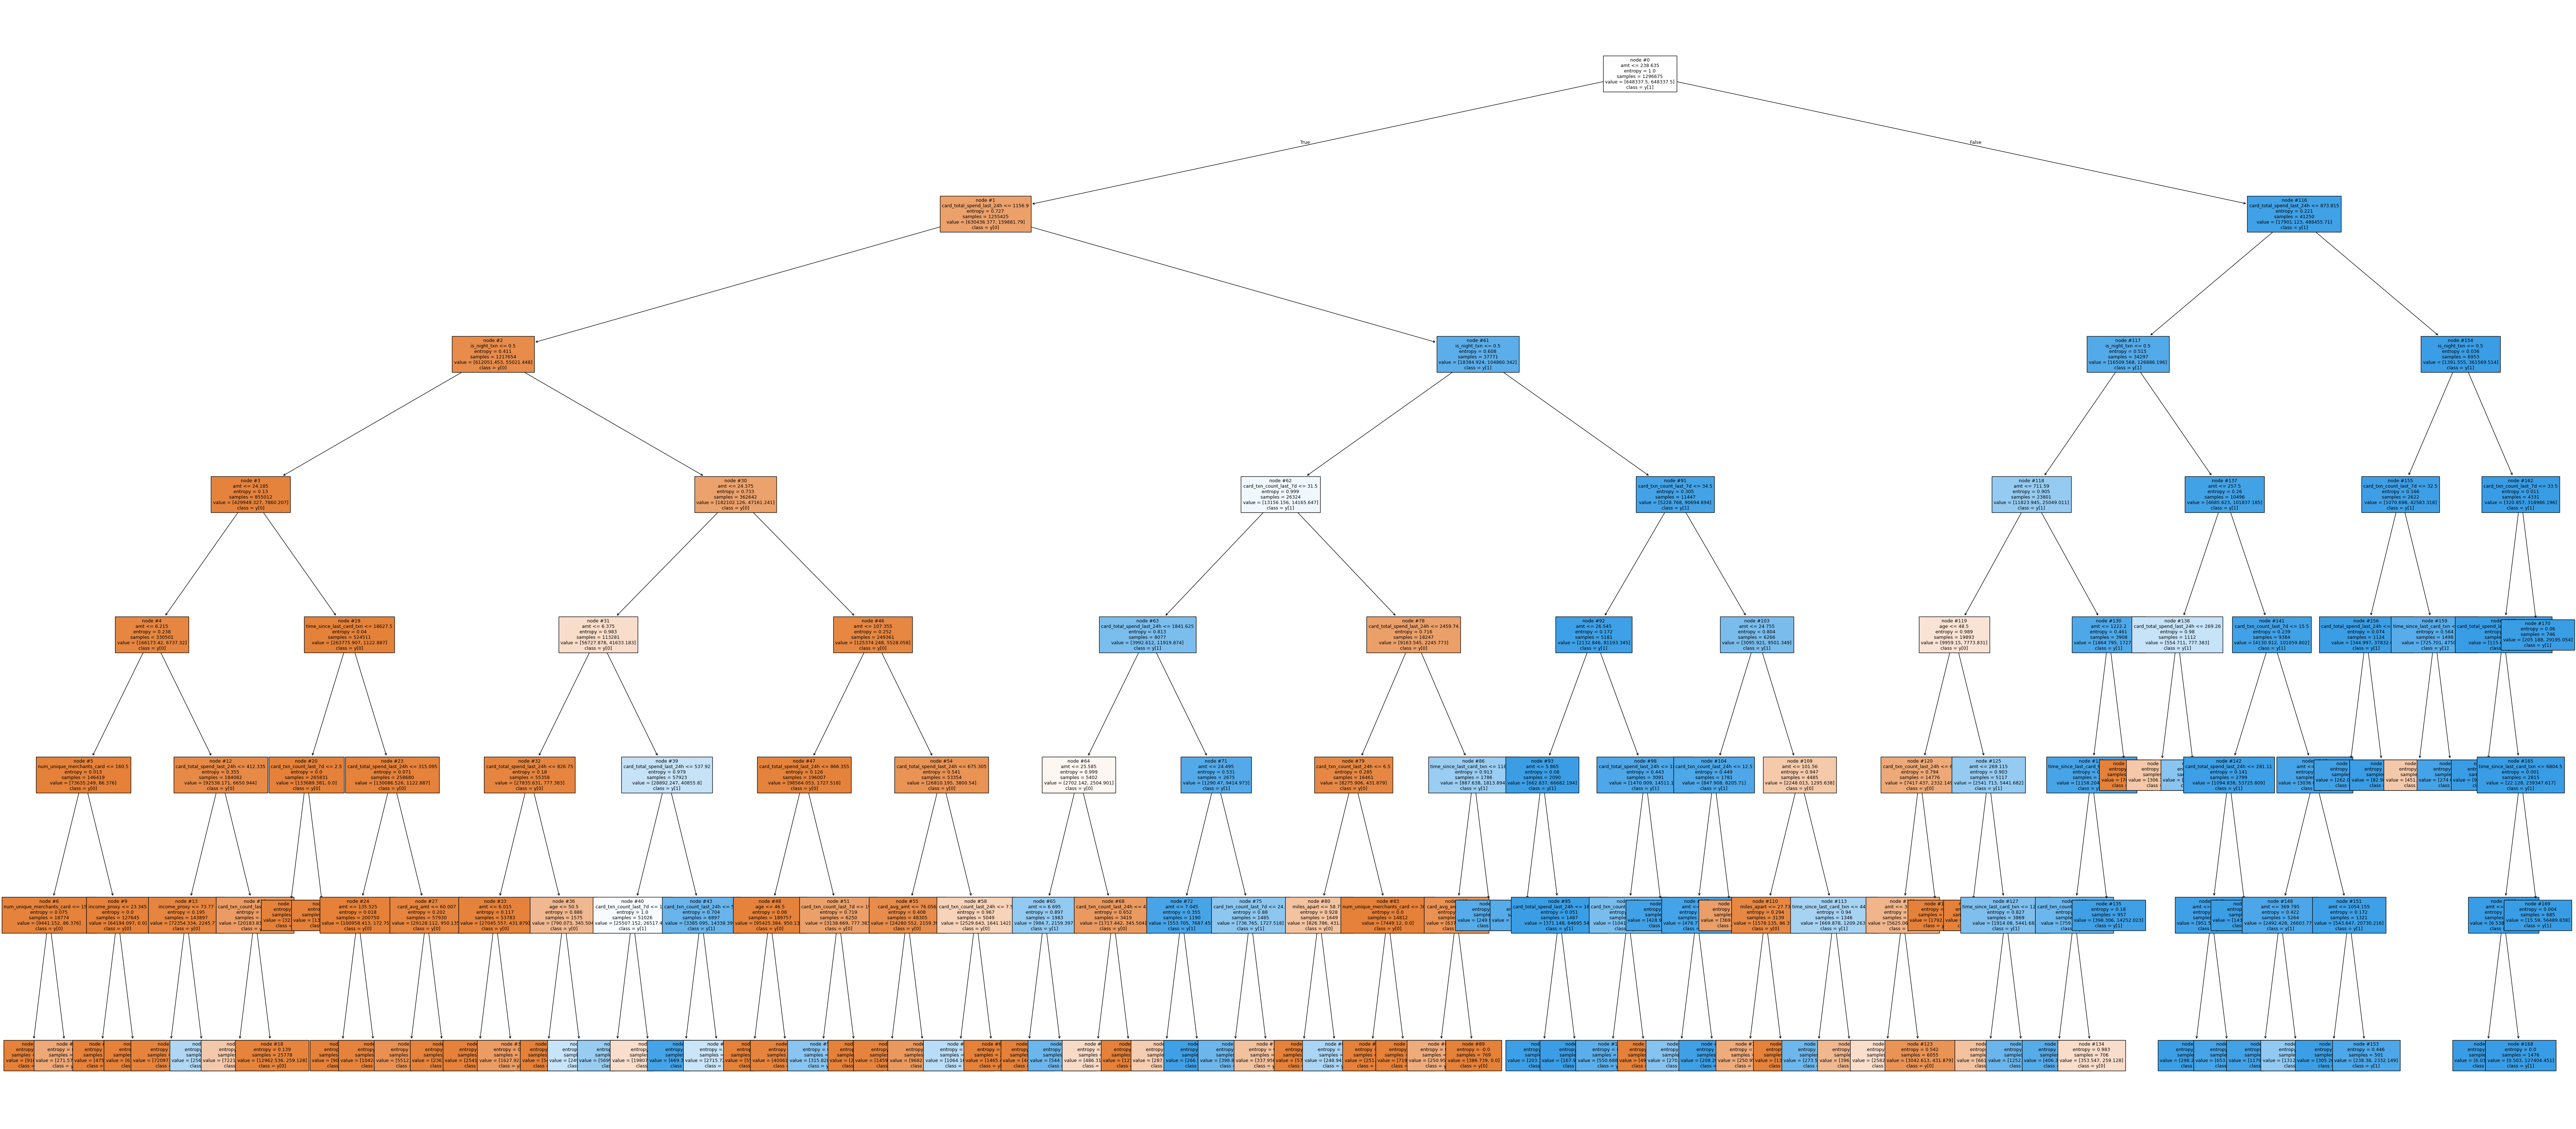

In [80]:
from sklearn import tree
#plotting the tree
features = list(X_train.columns)
plt.figure(figsize = (90, 40))
tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show() 

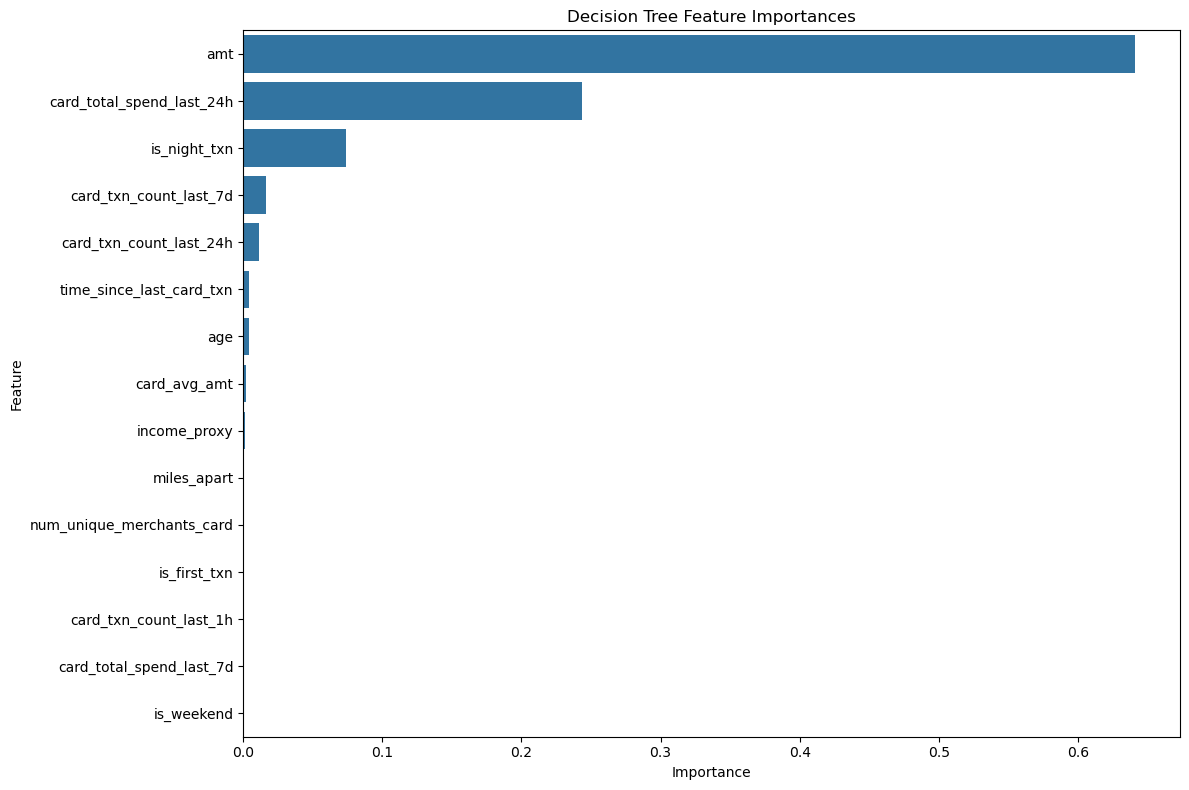

In [81]:
#show the feature importances in the tree (most important to least important)
feature_importances = d_tree.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show() 


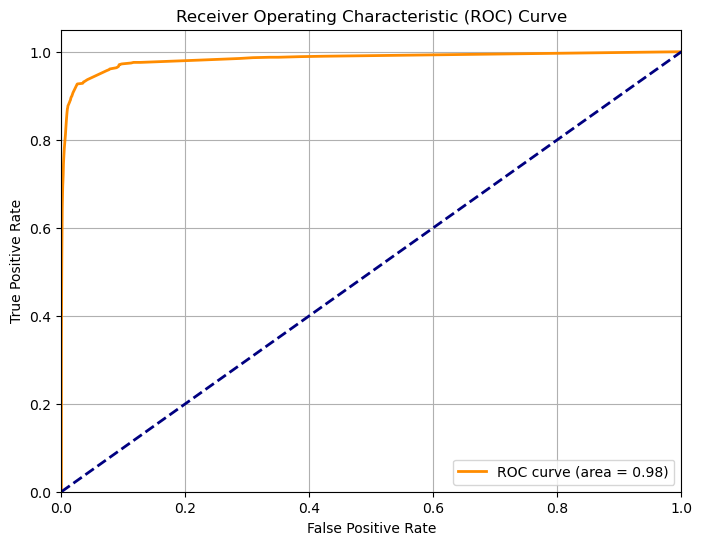

ROC AUC Score for Decision Tree before RandomizedSearchCV on Test Set: 0.9837


In [82]:
#ROC curve 
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])#y axis starts at 0 and only goes as high as 1.05
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for Decision Tree before RandomizedSearchCV on Test Set: {roc_auc:.4f}") 


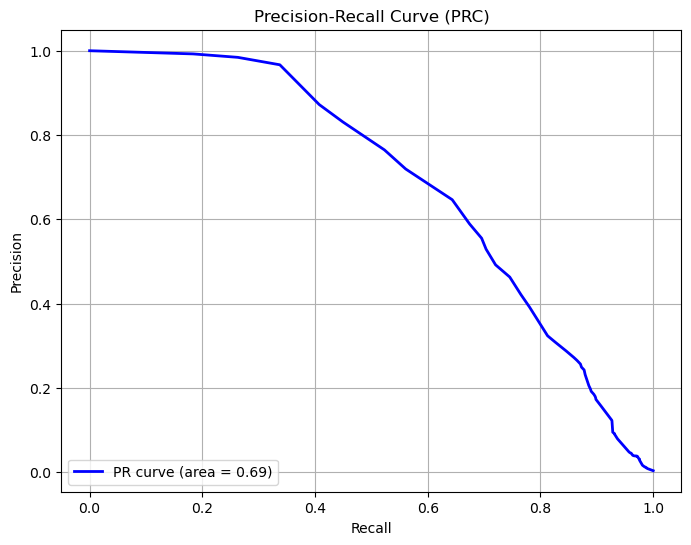

PR AUC Score for Decision Tree before RandomizedSearchCV on Test Set: 0.6902


In [83]:
#Percision Recall Curve
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for Decision Tree before RandomizedSearchCV on Test Set: {pr_auc:.4f}")

Randomized Search to find the best model

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np

d_tree_tuned = DecisionTreeClassifier(random_state=42, class_weight='balanced')
#choose a set of hyperparamaters to try in order to find an ideal group to create the best performing model
param_dist = {'max_depth': np.arange(2, 10),'criterion': ['gini', 'entropy'],'min_samples_leaf': [500, 600, 700, 800],'min_samples_split': [100, 200, 300, 400]}
#scorer tells RandomizedSearchCV to maximize recall for the fraud class 
# Recall ensures the model catches as many fraudulent transactions as possible 
scorer = make_scorer(recall_score, pos_label=1)
#random_search uses tuned d_tree, the params from param_dist to find the best model, tries 50 combos on 5 diffrent folds
random_search = RandomizedSearchCV(
   estimator=d_tree_tuned, param_distributions=param_dist,n_iter=50,scoring=scorer,cv=5,n_jobs=-1,random_state=42,verbose=2)       

random_search.fit(X_train, y_train)
#choose the best estimator from RandomizedSearchCV
d_tree_tuned = random_search.best_estimator_ 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=600, min_samples_split=100; total time=   9.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=800, min_samples_split=300; total time=   7.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=700, min_samples_split=200; total time=   6.4s


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END criterion=entropy, max_depth=8, min_samples_leaf=600, min_samples_split=100; total time=   9.1s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=800, min_samples_split=300; total time=   7.1s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=600, min_samples_split=200; total time=  10.1s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=600, min_samples_split=400; total time=   5.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=600, min_samples_split=300; total time=   2.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=600, min_samples_split=300; total time=   2.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=800, min_samples_split=400; total time=   6.3s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=600, min_samples_split=200; total time=  10.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=700, min_samples_split=200; total time=   6.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=600, min_sam

In [86]:
y_proba_train = d_tree_tuned.predict_proba(X_train)[:, 1]
y_proba_test = d_tree_tuned.predict_proba(X_test)[:, 1]

threshold = 0.9
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

Decision Tree Training Classification Report (threshold=0.9):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1289169
           1       0.31      0.87      0.46      7506

    accuracy                           0.99   1296675
   macro avg       0.65      0.93      0.73   1296675
weighted avg       1.00      0.99      0.99   1296675

Decision Tree Test Classification Report (threshold=0.9):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.22      0.84      0.35      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.92      0.67    555719
weighted avg       1.00      0.99      0.99    555719



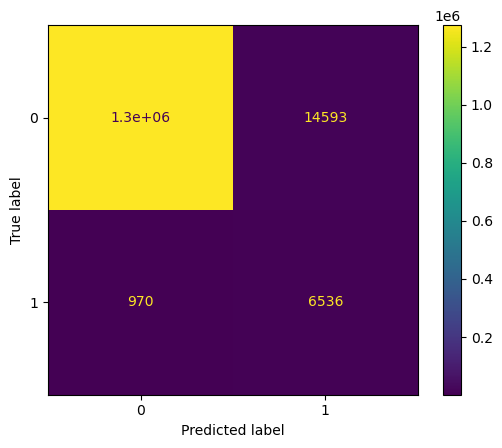

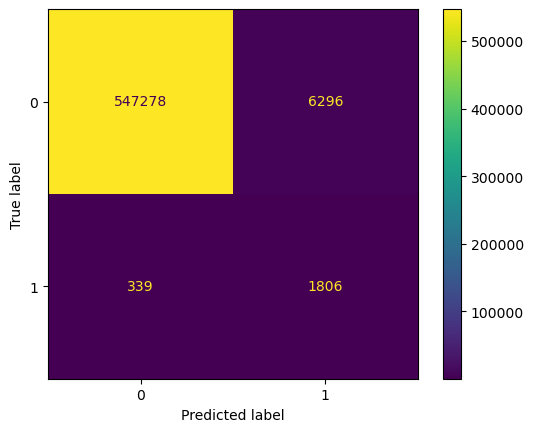

In [87]:
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train, display_labels=d_tree_tuned.classes_).plot()
print(f"Decision Tree Training Classification Report (threshold={threshold}):\n")
print(classification_report(y_train, y_pred_train))

# Test evaluation
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test, display_labels=d_tree_tuned.classes_).plot()
print(f"Decision Tree Test Classification Report (threshold={threshold}):\n")
print(classification_report(y_test, y_pred_test))

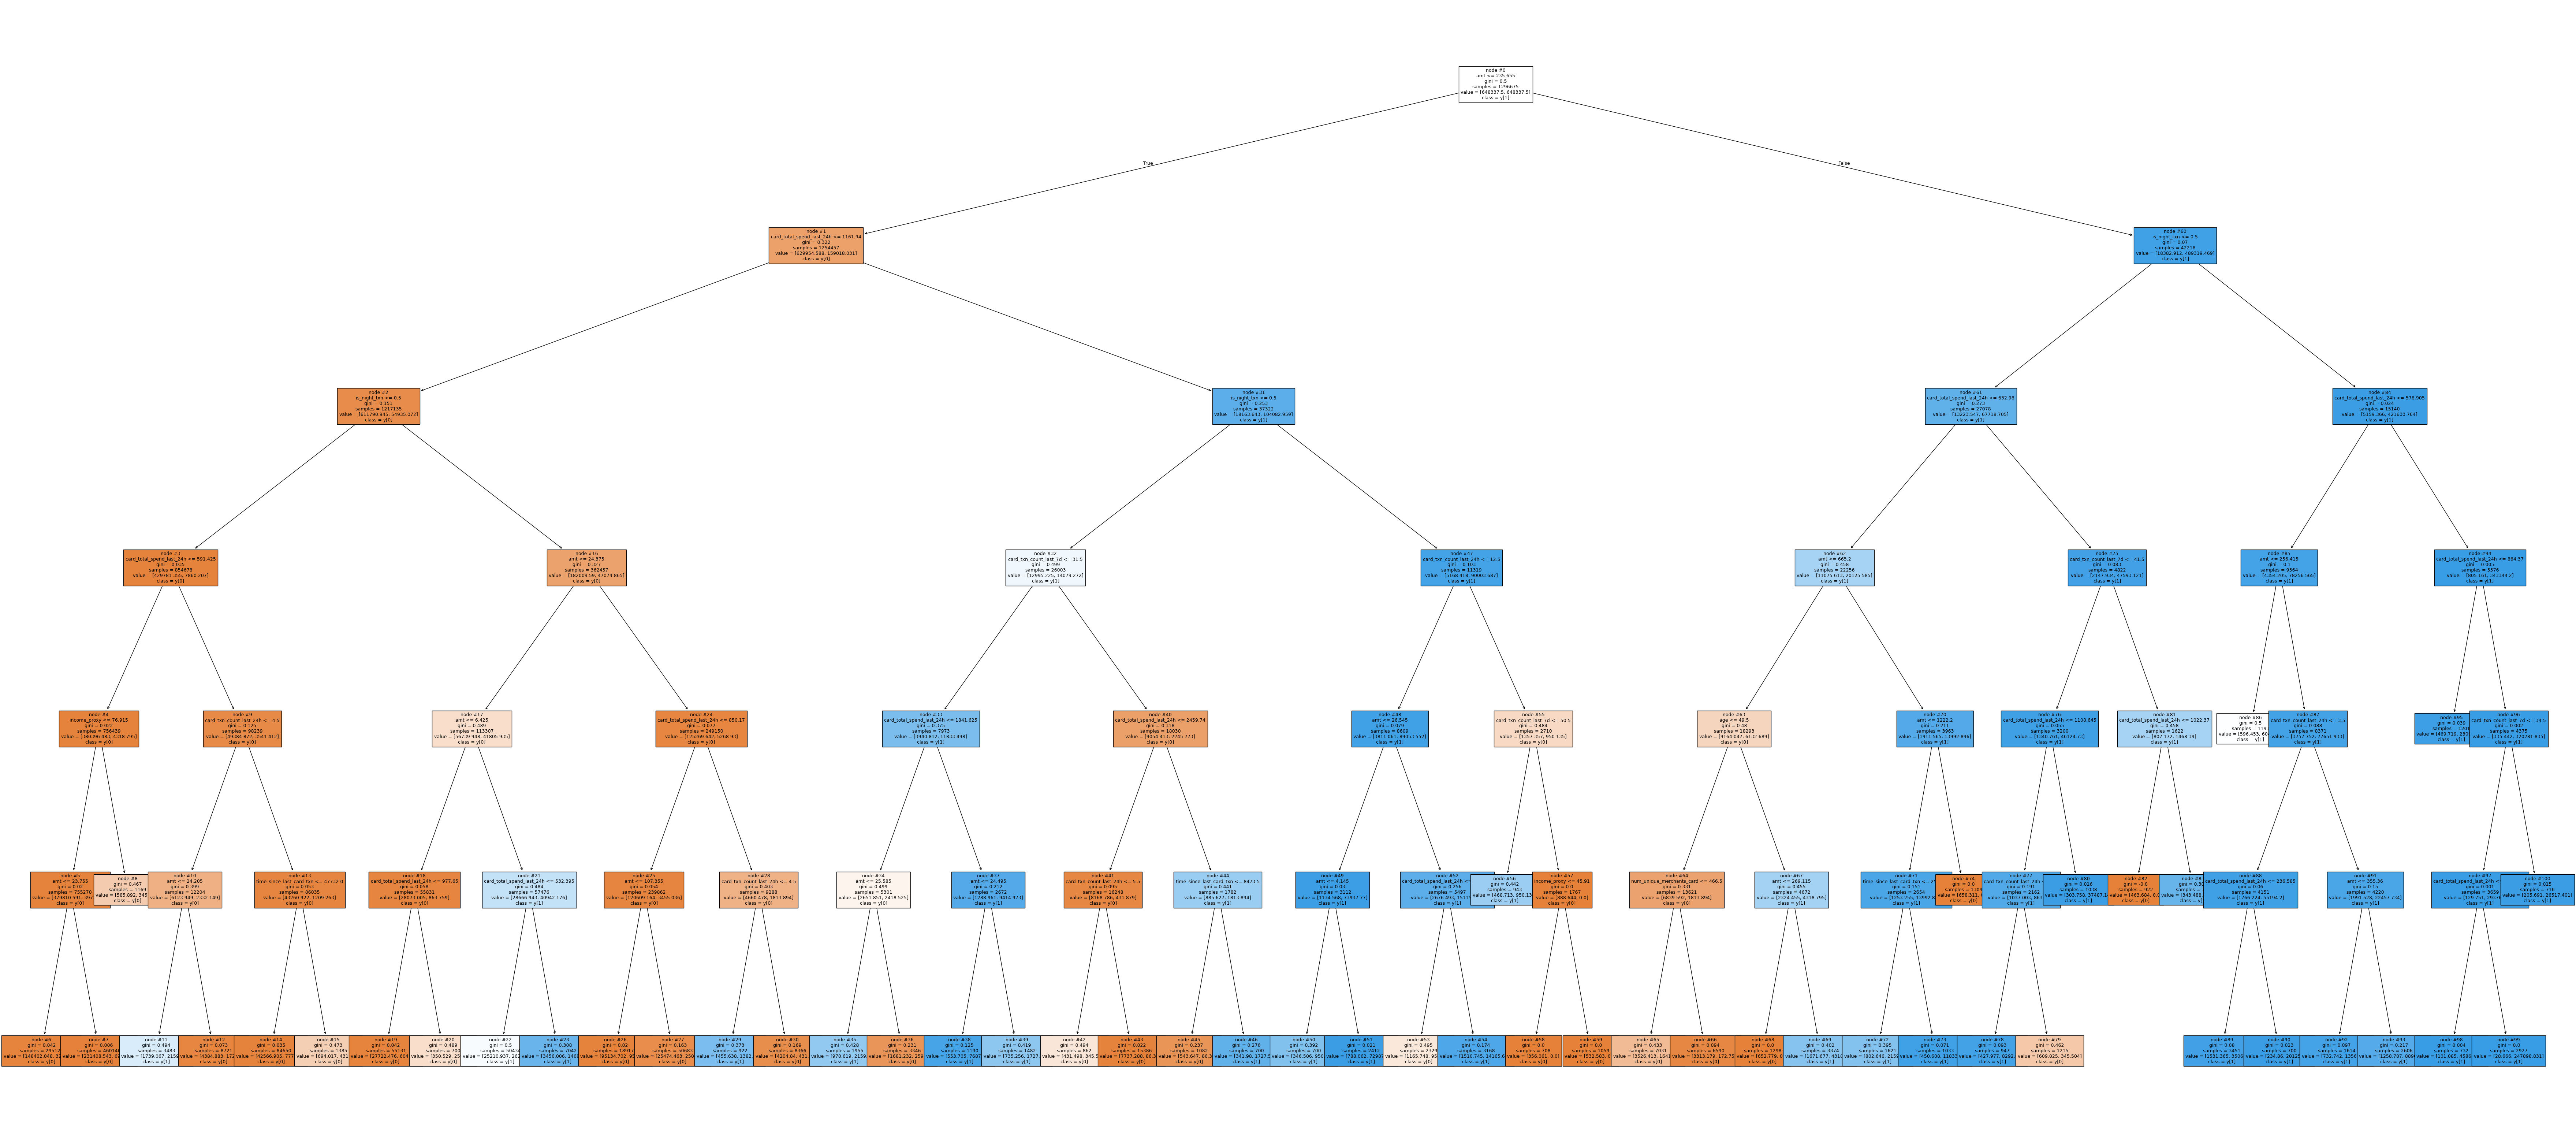

In [88]:
from sklearn import tree

features = list(X_train.columns)
plt.figure(figsize = (90, 40))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show() 

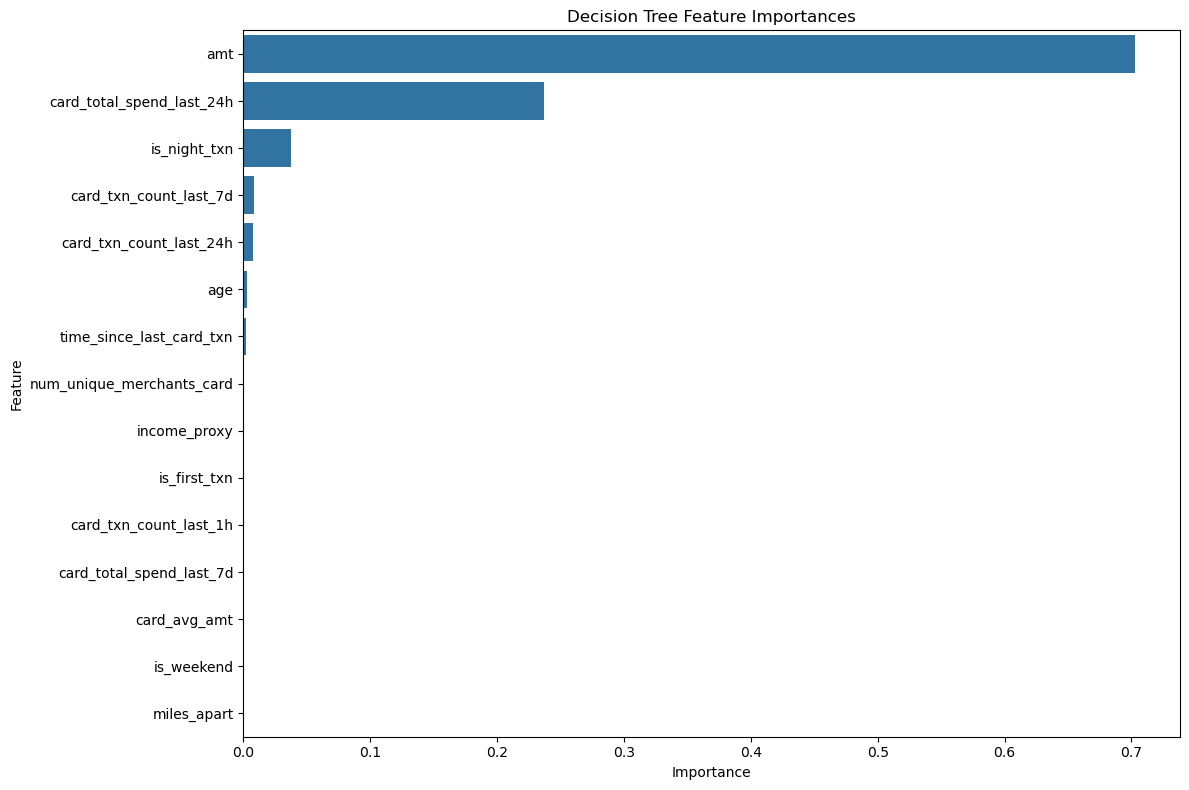

In [89]:
feature_importances = d_tree_tuned.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

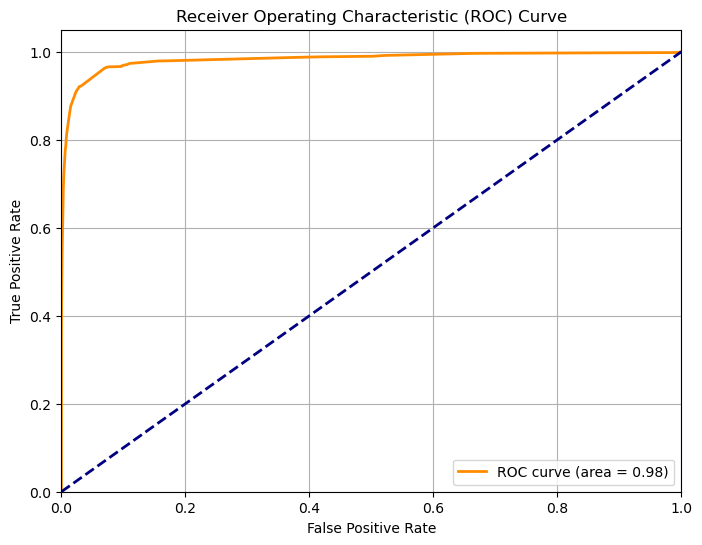

ROC AUC Score for Decision Tree on Test Set: 0.9829


In [90]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for Decision Tree on Test Set: {roc_auc:.4f}")

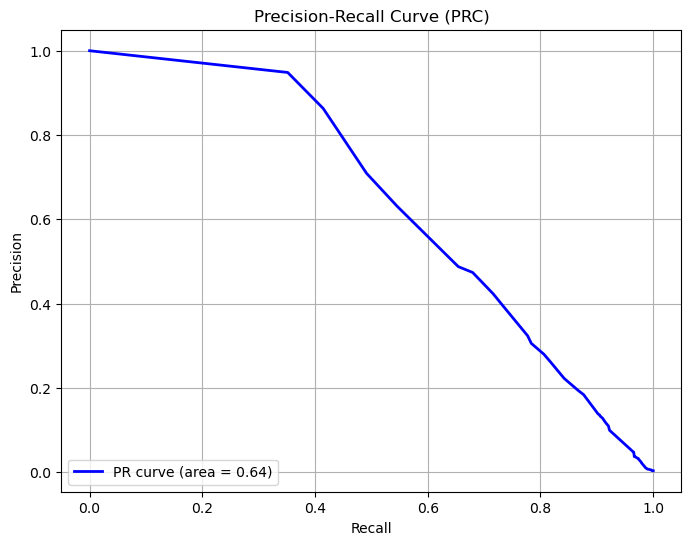

PR AUC Score for Decision Tree on Test Set: 0.6436


In [91]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve and AUPRC for test set
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for Decision Tree on Test Set: {pr_auc:.4f}")

### **Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(
    n_estimators=100,#number of trees used in the model
    max_depth=10,#max depth of trees
    min_samples_leaf=500,#minimum amount of samples allowed on a leaf for it to be in the tree
    class_weight='balanced',#Adjusts weights inversely proportional to class frequencies for imbalanced datasets
    random_state=42,
    n_jobs=-1) 
#rf = RandomForestClassifier(
   # n_estimators=100,number of trees used in the model
    #max_depth=10,max depth of trees
   # min_samples_leaf=500,minimum amount of samples allowed on a leaf for it to be in the tree
    #class_weight='balanced',adjusts weights inversely proportional to class frequencies for imbalanced datasets
    #random_state=42, ensures reproducability of the model
   # n_jobs=-1 # Uses all available CPU cores to speed up training) 

In [95]:
X_train = fraudTrain.drop(columns=['is_fraud'])
y_train = fraudTrain['is_fraud']
X_test = fraudTest.drop(columns=['is_fraud'])
y_test = fraudTest['is_fraud']
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}") 

Shape of X_train: (1296675, 15)
Shape of y_train: (1296675,)
Shape of X_test: (555719, 15)
Shape of y_test: (555719,)


In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, n_jobs=-1, random_state=42)

Random Forest Training Classification Report (threshold =0.921 ):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.91      0.69      0.78      7506

    accuracy                           1.00   1296675
   macro avg       0.95      0.84      0.89   1296675
weighted avg       1.00      1.00      1.00   1296675

Random Forest Test Classification Report before RandomizedSearchCV (threshold = 0.921):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.64      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.82      0.86    555719
weighted avg       1.00      1.00      1.00    555719



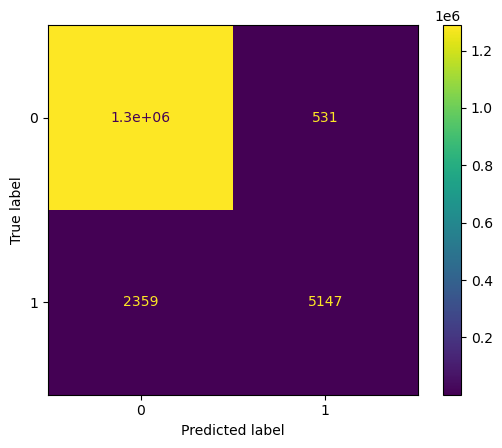

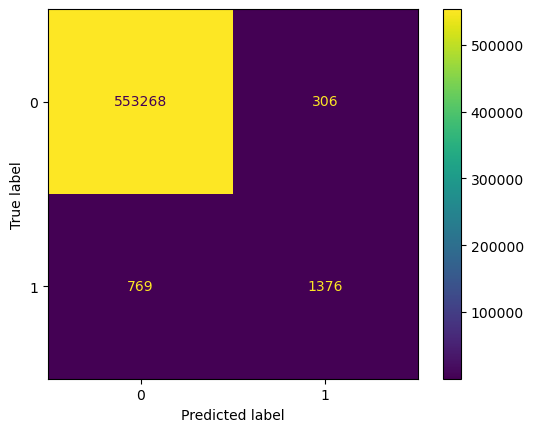

In [97]:
y_proba_train = rf.predict_proba(X_train)[:, 1] 
y_proba_test = rf.predict_proba(X_test)[:, 1]

threshold = 0.921
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=rf.classes_)
disp.plot()

print(f"Random Forest Training Classification Report (threshold ={threshold} ):\n")
print(classification_report(y_train, y_pred_train))
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=rf.classes_)
disp.plot()

print(f"Random Forest Test Classification Report before RandomizedSearchCV (threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_test)) 

How much money did this model save?

In [99]:
transaction_amounts_test = X_test['amt']  

TP_mask = (y_test == 1) & (y_pred_test == 1) #True Positive 
FP_mask = (y_test == 0) & (y_pred_test == 1) #False Positive 
FN_mask = (y_test == 1) & (y_pred_test == 0) #False Negative 
TN_mask = (y_test == 0) & (y_pred_test == 0) #True Negative 

TP_money = transaction_amounts_test[TP_mask].sum() #sum of money in category
FP_money = transaction_amounts_test[FP_mask].sum()#sum of money in category
FN_money = transaction_amounts_test[FN_mask].sum()#sum of money in category
TN_money = transaction_amounts_test[TN_mask].sum()#sum of money in category

print("\nFinancial impact based on actual transaction amounts (test set):")
print(f"  True Positives (fraud caught) → ${TP_money:,.2f} saved")
print(f"  False Positives (legit flagged) → ${FP_money:,.2f} incorrectly blocked")
print(f"  False Negatives (fraud missed) → ${FN_money:,.2f} lost")
print(f"  True Negatives (legit passed) → ${TN_money:,.2f} legitimate passed")


Financial impact based on actual transaction amounts (test set):
  True Positives (fraud caught) → $882,333.40 saved
  False Positives (legit flagged) → $108,883.88 incorrectly blocked
  False Negatives (fraud missed) → $250,991.28 lost
  True Negatives (legit passed) → $37,320,694.55 legitimate passed


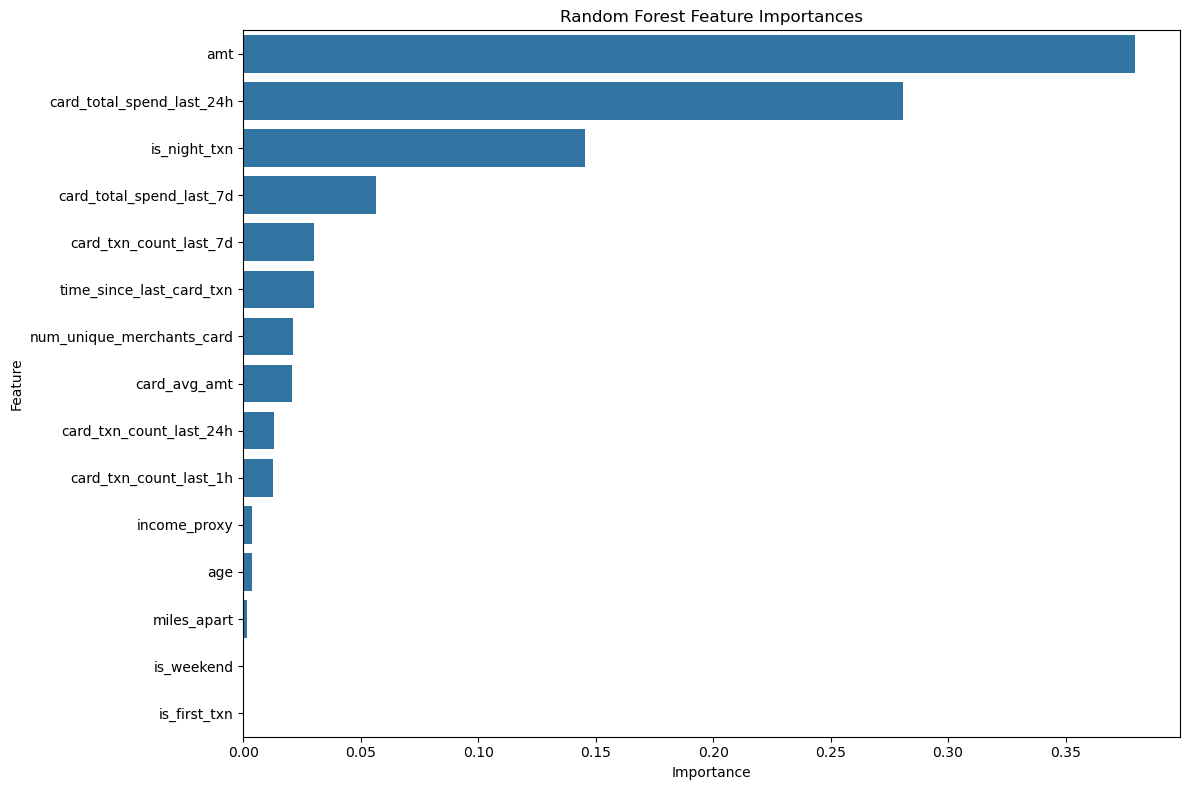

In [100]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

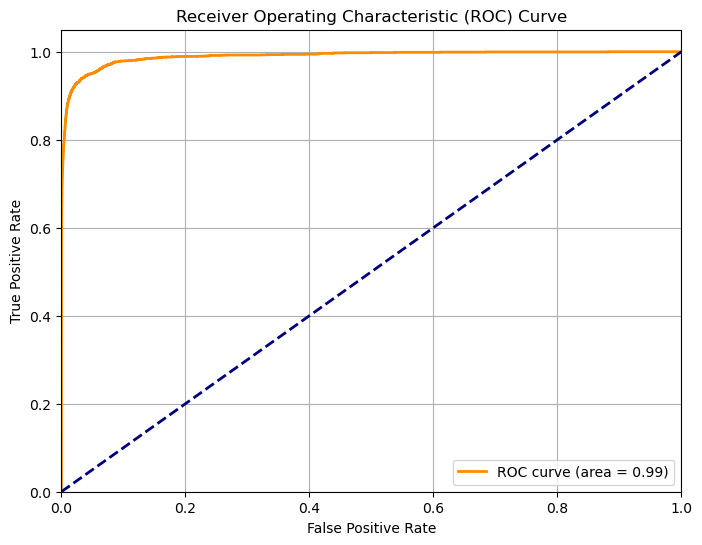

ROC AUC Score for Random Forest before RandomizedSearchCV on Test Set: 0.9898


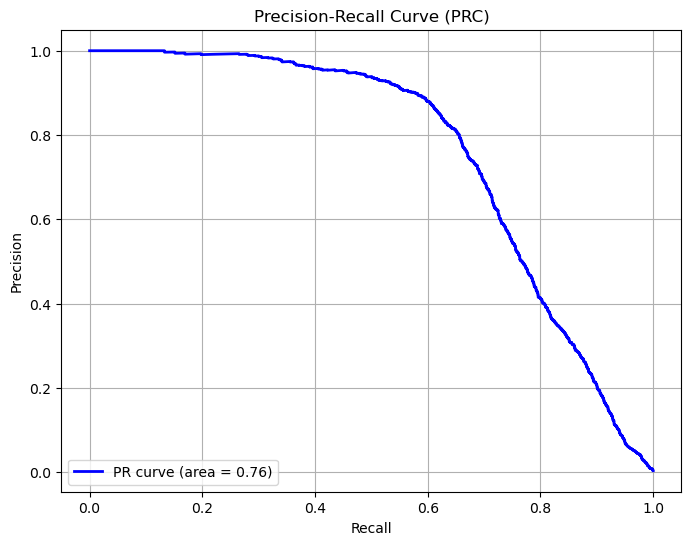

PR AUC Score for Random Forest before RandomizedSearchCV on Test Set: 0.7569


In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for Random Forest before RandomizedSearchCV on Test Set: {roc_auc:.4f}") 

# Calculate Precision-Recall curve and AUPRC for test set
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for Random Forest before RandomizedSearchCV on Test Set: {pr_auc:.4f}")

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np

from sklearn.model_selection import train_test_split
# Only 30% of the training data is used here to reduce computation time and memory usage
# This makes hyperparameter tuning faster while still providing a reasonable estimate of model performance
X_train_30, _, y_train_30, _ = train_test_split(X_train,
    y_train,
    train_size=0.30,
    stratify=y_train,   
    random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1)

param_dist = {
    'n_estimators': [200, 300, 400],         
    'max_depth': [12, 14, 16],'min_samples_leaf': [50, 100, 200],
    'min_samples_split': [100, 200, 300],'max_features': ['sqrt', 'log2', 0.5]}

scorer = make_scorer(recall_score, pos_label=1)

random_search = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=25,
    scoring=scorer,
    cv=3,
    random_state=42,
    verbose=2,
    n_jobs=1)

random_search.fit(X_train_30, y_train_30)

rf_tuned = random_search.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=200, min_samples_split=300, n_estimators=200; total time=   9.6s
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=200, min_samples_split=300, n_estimators=200; total time=   9.6s
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=200, min_samples_split=300, n_estimators=200; total time=  11.1s
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=200; total time=  11.3s
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=200; total time=  10.9s
[CV] END max_depth=12, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=200; total time=  10.0s
[CV] END max_depth=14, max_features=0.5, min_samples_leaf=100, min_samples_split=300, n_estimators=400; total time=  36.7s
[CV] END max_depth=14, max_features=0.5, min_samples_leaf=100, min_samples_

In [103]:
rf_tuned 

RandomForestClassifier(class_weight='balanced', max_depth=16, max_features=0.5,
                       min_samples_leaf=200, min_samples_split=100,
                       n_estimators=400, n_jobs=-1, random_state=42)

Random Forest Training Classification Report (threshold =0.9325 ):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.72      0.82      0.77      7506

    accuracy                           1.00   1296675
   macro avg       0.86      0.91      0.88   1296675
weighted avg       1.00      1.00      1.00   1296675

 Random Forest Test Classification Report (threshold = 0.9325):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.62      0.76      0.68      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.88      0.84    555719
weighted avg       1.00      1.00      1.00    555719



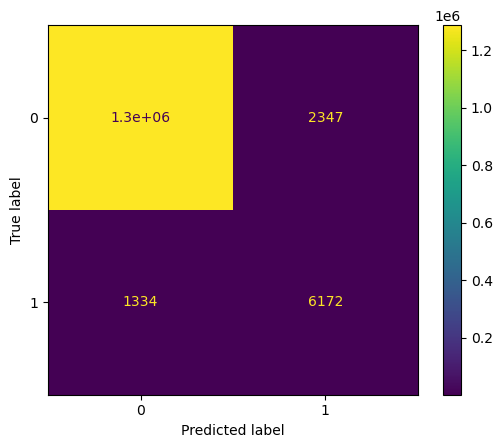

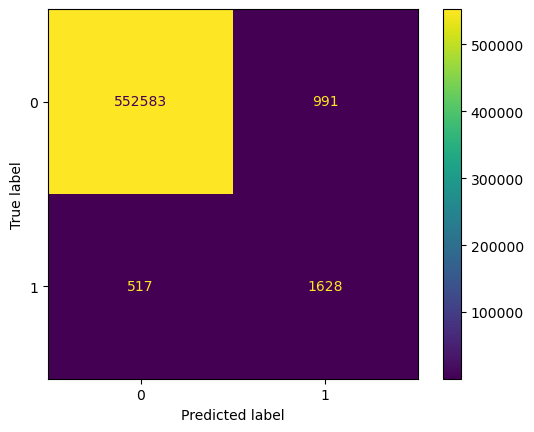

In [104]:
X_train = fraudTrain.drop(columns=['is_fraud'])
y_train = fraudTrain['is_fraud']
X_test = fraudTest.drop(columns=['is_fraud'])
y_test = fraudTest['is_fraud']
rf= RandomForestClassifier(
    n_estimators=400,
    criterion = 'gini',
    max_depth=16,
    min_samples_leaf=200, 
    min_samples_split=100, 
    max_features = 0.5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1) #RESULTS OF THE RANDOM CV  

rf.fit(X_train,y_train) 

y_proba_train = rf.predict_proba(X_train)[:, 1] 
y_proba_test = rf.predict_proba(X_test)[:, 1]

threshold = 0.9325
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=rf.classes_)
disp.plot()

print(f"Random Forest Training Classification Report (threshold ={threshold} ):\n")
print(classification_report(y_train, y_pred_train))
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=rf.classes_)
disp.plot()

print(f" Random Forest Test Classification Report (threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_test))

In [105]:
#Finance impact of this model  
transaction_amounts_test = X_test['amt']  

TP_mask = (y_test == 1) & (y_pred_test == 1)  
FP_mask = (y_test == 0) & (y_pred_test == 1)  
FN_mask = (y_test == 1) & (y_pred_test == 0)  
TN_mask = (y_test == 0) & (y_pred_test == 0)  

TP_money = transaction_amounts_test[TP_mask].sum()
FP_money = transaction_amounts_test[FP_mask].sum()
FN_money = transaction_amounts_test[FN_mask].sum()
TN_money = transaction_amounts_test[TN_mask].sum()

print("\nFinancial impact based on actual transaction amounts (test set):")
print(f"  True Positives (fraud caught) → ${TP_money:,.2f} saved")
print(f"  False Positives (legit flagged) → ${FP_money:,.2f} incorrectly blocked")
print(f"  False Negatives (fraud missed) → ${FN_money:,.2f} lost")
print(f"  True Negatives (legit passed) → ${TN_money:,.2f} legitimate passed")


Financial impact based on actual transaction amounts (test set):
  True Positives (fraud caught) → $1,002,299.39 saved
  False Positives (legit flagged) → $384,409.63 incorrectly blocked
  False Negatives (fraud missed) → $131,025.29 lost
  True Negatives (legit passed) → $37,045,168.80 legitimate passed


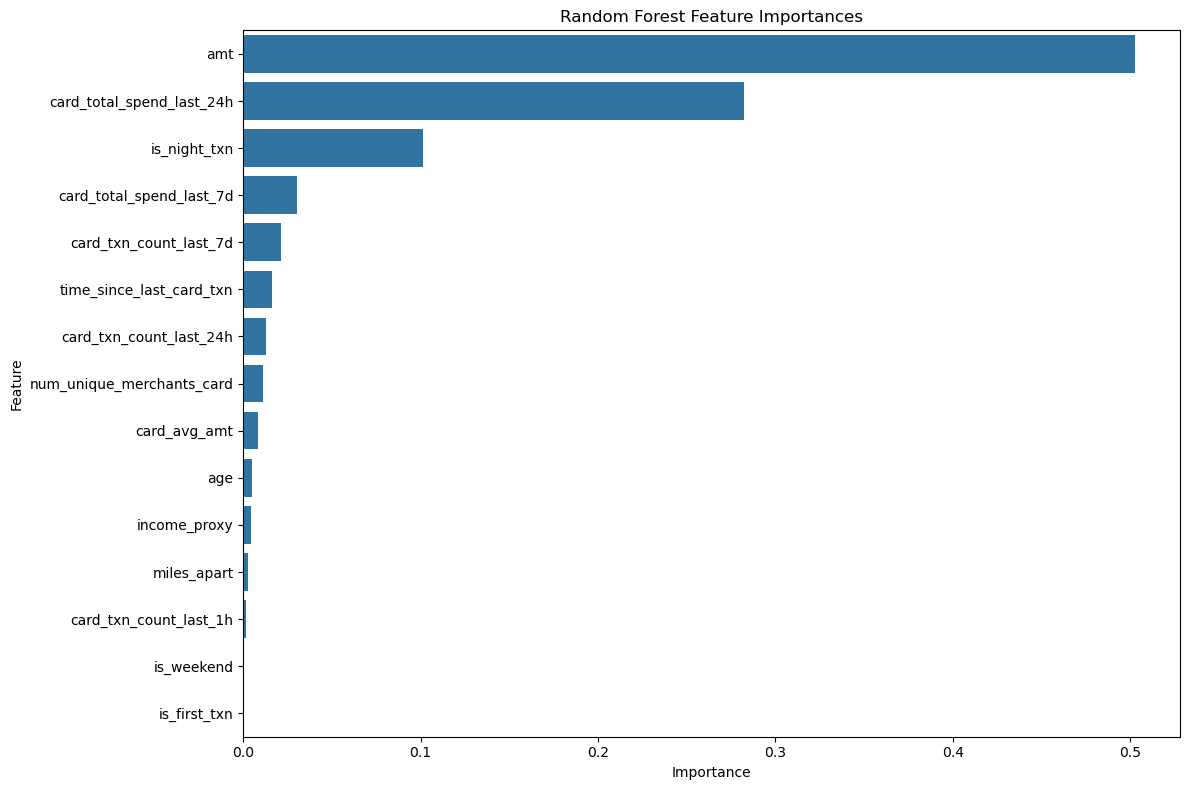

In [106]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

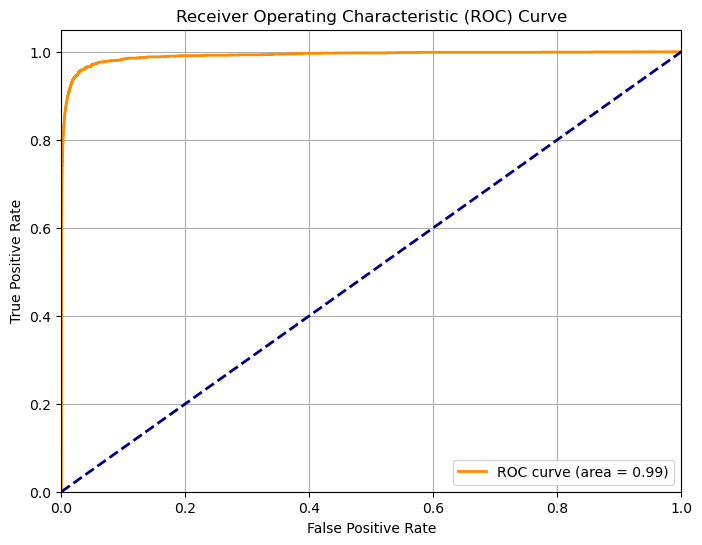

ROC AUC Score for Random Forest on Test Set: 0.9916


In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for Random Forest on Test Set: {roc_auc:.4f}")

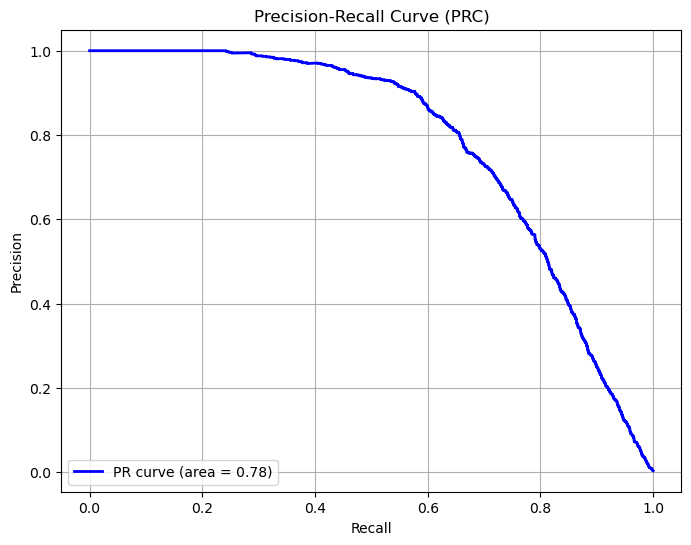

PR AUC Score for Random Forest on Test Set: 0.7798


In [108]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for Random Forest on Test Set: {pr_auc:.4f}")

**XgBoost**

In [110]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [111]:
xgb = XGBClassifier()

In [112]:
X_train = fraudTrain.drop(columns=['is_fraud'])
y_train = fraudTrain['is_fraud']
X_test = fraudTest.drop(columns=['is_fraud'])
y_test = fraudTest['is_fraud']
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}") 

Shape of X_train: (1296675, 15)
Shape of y_train: (1296675,)
Shape of X_test: (555719, 15)
Shape of y_test: (555719,)


In [113]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric='aucpr',
    tree_method='hist',
    random_state=42) 


#xgb = XGBClassifier(
    #n_estimators=300, Number of trees used
    #max_depth=6, Maximum depth of each tree
   # learning_rate=0.05, Step size shrinkage; lower values make learning more conservative and improve generalization
   # subsample=0.8, Pct of training data used for each tree; prevents overfitting by introducing randomness
    #colsample_bytree=0.8,Pct of features used per tree; also reduces overfitting
   # scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),Balances positive and negative classes for imbalanced datasets
                         #Sets weight to roughly match class imbalance ratio
   # eval_metric='aucpr', # eval metric for model performance; AUC-PR is useful for imbalanced datasets like fraud
    #tree_method='hist',  # Uses histogram-based algorithm for faster training on large datasets
    #random_state=42      # Ensures reproducibility 
#)


xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

Training Classification Report before RandomizedSearchCV (threshold =0.95 ):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.79      0.88      0.84      7506

    accuracy                           1.00   1296675
   macro avg       0.90      0.94      0.92   1296675
weighted avg       1.00      1.00      1.00   1296675

Test Classification Report before RandomizedSearchCV (threshold = 0.95):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.78      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.89      0.85    555719
weighted avg       1.00      1.00      1.00    555719


Financial impact based on actual transaction amounts (test set):
  True Positives (fraud caught) → $996,278.73 saved
  False Positives (legit flagged) → $445,262.20 incorrectly blocked
  False 

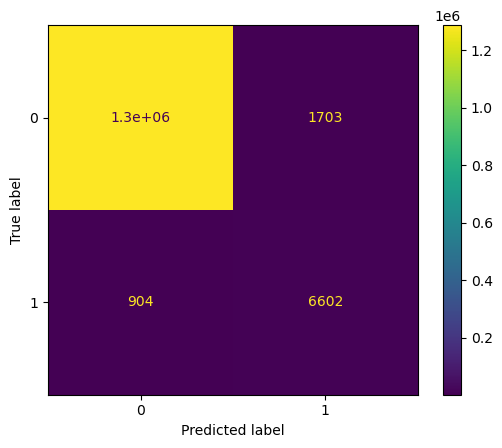

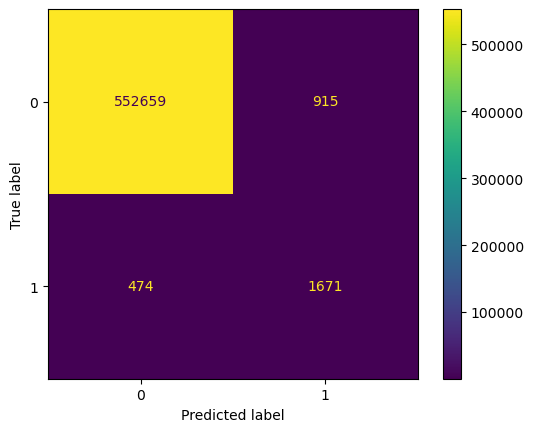

In [114]:
y_proba_train = xgb.predict_proba(X_train)[:, 1] 
y_proba_test = xgb.predict_proba(X_test)[:, 1]

threshold = 0.95
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=rf.classes_)
disp.plot()

print(f"Training Classification Report before RandomizedSearchCV (threshold ={threshold} ):\n")
print(classification_report(y_train, y_pred_train))
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=xgb.classes_)
disp.plot()

print(f"Test Classification Report before RandomizedSearchCV (threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_test)) 
transaction_amounts_test = X_test['amt']  

# Masks for each type
TP_mask = (y_test == 1) & (y_pred_test == 1)  
FP_mask = (y_test == 0) & (y_pred_test == 1)  
FN_mask = (y_test == 1) & (y_pred_test == 0)  
TN_mask = (y_test == 0) & (y_pred_test == 0)  

# Sum transaction amounts
TP_money = transaction_amounts_test[TP_mask].sum()
FP_money = transaction_amounts_test[FP_mask].sum()
FN_money = transaction_amounts_test[FN_mask].sum()
TN_money = transaction_amounts_test[TN_mask].sum()

# Print results
print("\nFinancial impact based on actual transaction amounts (test set):")
print(f"  True Positives (fraud caught) → ${TP_money:,.2f} saved")
print(f"  False Positives (legit flagged) → ${FP_money:,.2f} incorrectly blocked")
print(f"  False Negatives (fraud missed) → ${FN_money:,.2f} lost")
print(f"  True Negatives (legit passed) → ${TN_money:,.2f} legitimate passed")

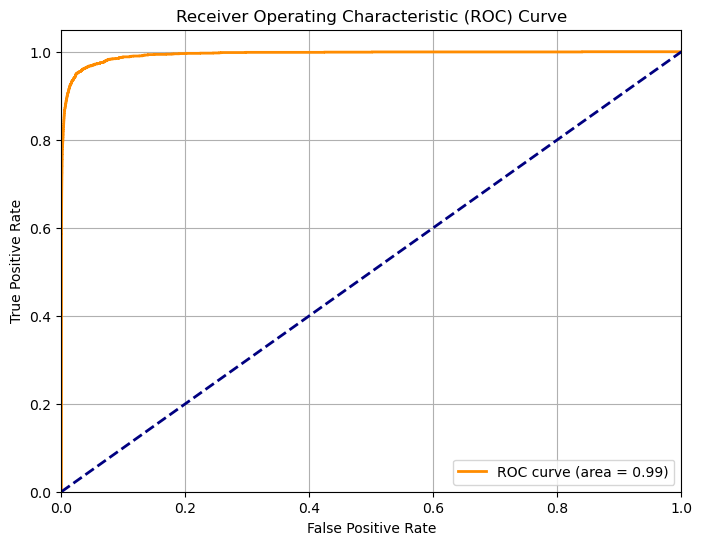

ROC AUC Score for XGBoost before RandomizedSearchCV on Test Set: 0.9939


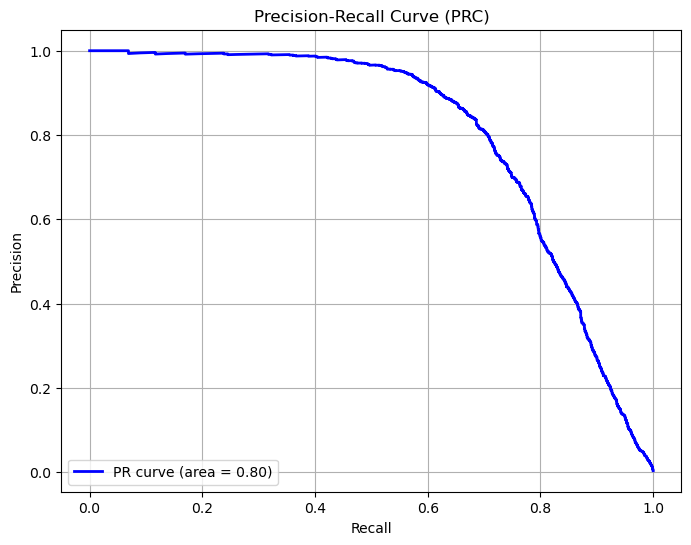

PR AUC Score for XGBoost before RandomizedSearchCV on Test Set: 0.8028


In [115]:
from sklearn.metrics import average_precision_score
#print("Train PR-AUC:", average_precision_score(y_train, y_proba_train))
#print("Test PR-AUC:", average_precision_score(y_test, y_proba_test)) 
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for XGBoost before RandomizedSearchCV on Test Set: {roc_auc:.4f}") 

# Calculate Precision-Recall curve and AUPRC for test set
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for XGBoost before RandomizedSearchCV on Test Set: {pr_auc:.4f}")

In [116]:
X_train_30, _, y_train_30, _ = train_test_split(X_train,
    y_train,
    train_size=0.30,
    stratify=y_train,   
    random_state=42)

xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1)

param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8],                 
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'min_child_weight': [50, 100, 200],     
    'gamma': [0, 0.1, 0.3]}

scorer = make_scorer(recall_score, pos_label=1)

random_search = RandomizedSearchCV(
    estimator=xgb,param_distributions=param_dist,
    n_iter=25,
    scoring=scorer,
    cv=3,
    random_state=42,
    verbose=2,
    n_jobs=2)

random_search.fit(X_train_30, y_train_30)

xgb_tuned = random_search.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [117]:
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=50, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=-1, num_parallel_tree=None, ...)

In [118]:
X_train = fraudTrain.drop(columns=['is_fraud'])
y_train = fraudTrain['is_fraud']
X_test = fraudTest.drop(columns=['is_fraud'])
y_test = fraudTest['is_fraud']

Training Classification Report (threshold =0.94 ):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.88      0.96      0.92      7506

    accuracy                           1.00   1296675
   macro avg       0.94      0.98      0.96   1296675
weighted avg       1.00      1.00      1.00   1296675

Test Classification Report (threshold = 0.94):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.69      0.75      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.87      0.86    555719
weighted avg       1.00      1.00      1.00    555719



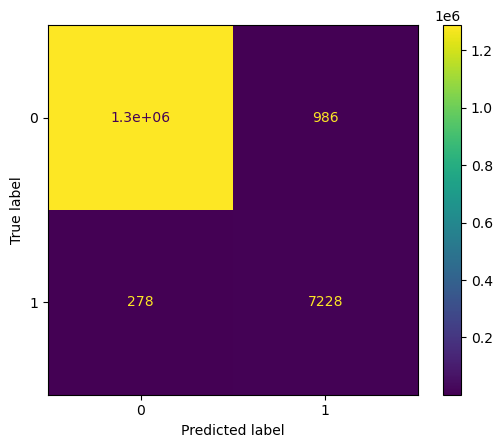

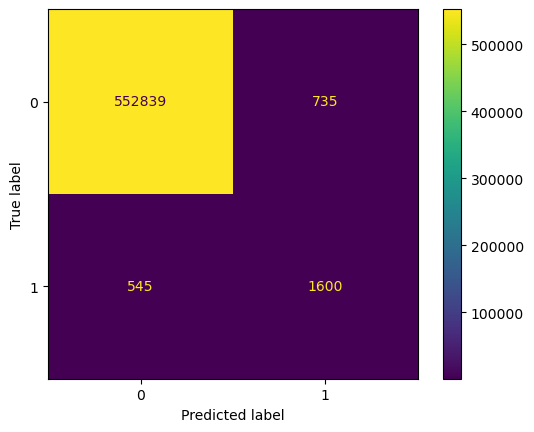

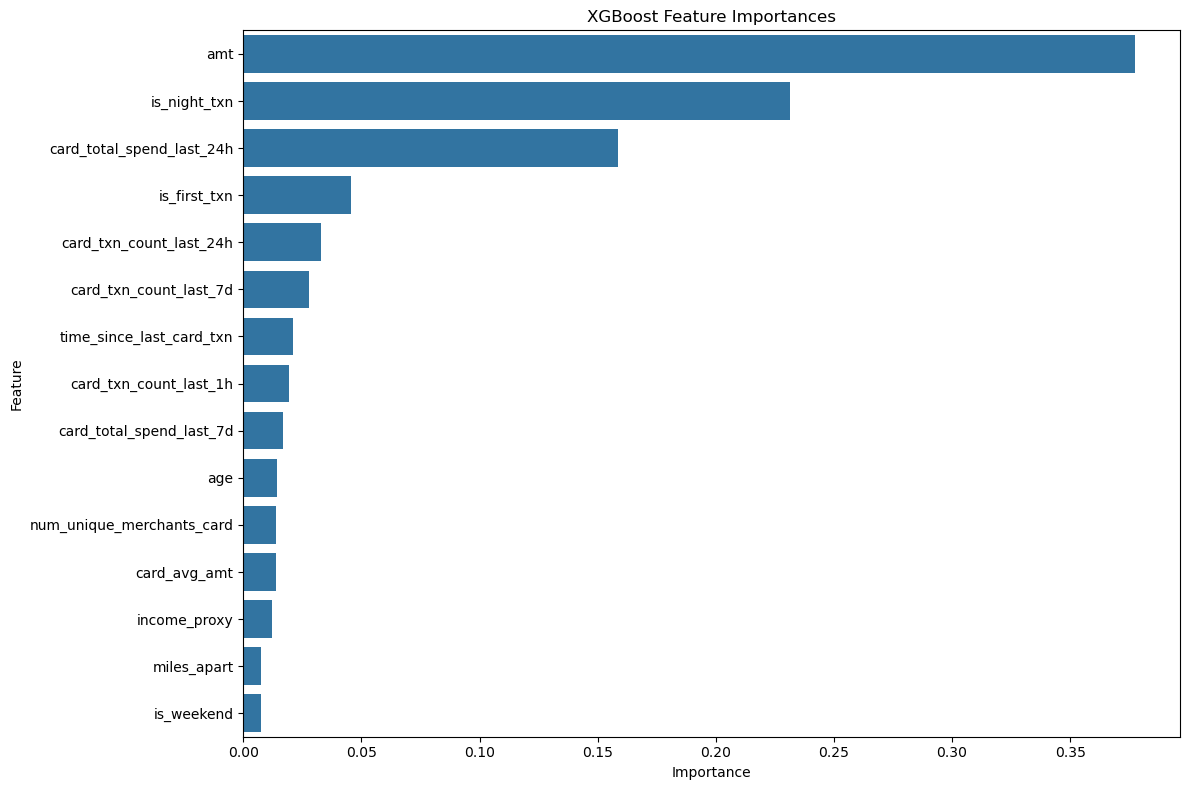

In [119]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1, 
    gamma = 0.3,
    min_child_weight = 50,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric='aucpr',
    tree_method='hist',
    random_state=42, 
    n_jobs=-1)
xgb.fit(X_train,y_train) 

y_proba_train = xgb.predict_proba(X_train)[:, 1] 
y_proba_test = xgb.predict_proba(X_test)[:, 1]

threshold = 0.94
y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)

cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=xgb.classes_)
disp.plot()

print(f"Training Classification Report (threshold ={threshold} ):\n")
print(classification_report(y_train, y_pred_train))
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=xgb.classes_)
disp.plot()

print(f"Test Classification Report (threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_test)) 


feature_importances = xgb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [120]:
transaction_amounts_test = X_test['amt']  

# Masks for each type
TP_mask = (y_test == 1) & (y_pred_test == 1) 
FP_mask = (y_test == 0) & (y_pred_test == 1)  
FN_mask = (y_test == 1) & (y_pred_test == 0)  
TN_mask = (y_test == 0) & (y_pred_test == 0)  

# Sum transaction amounts
TP_money = transaction_amounts_test[TP_mask].sum()
FP_money = transaction_amounts_test[FP_mask].sum()
FN_money = transaction_amounts_test[FN_mask].sum()
TN_money = transaction_amounts_test[TN_mask].sum()

# Print results
print("\nFinancial impact based on actual transaction amounts (test set):")
print(f"  True Positives (fraud caught) → ${TP_money:,.2f} saved")
print(f"  False Positives (legit flagged) → ${FP_money:,.2f} incorrectly blocked")
print(f"  False Negatives (fraud missed) → ${FN_money:,.2f} lost")
print(f"  True Negatives (legit passed) → ${TN_money:,.2f} legitimate passed")


Financial impact based on actual transaction amounts (test set):
  True Positives (fraud caught) → $968,317.05 saved
  False Positives (legit flagged) → $356,053.45 incorrectly blocked
  False Negatives (fraud missed) → $165,007.63 lost
  True Negatives (legit passed) → $37,073,524.98 legitimate passed


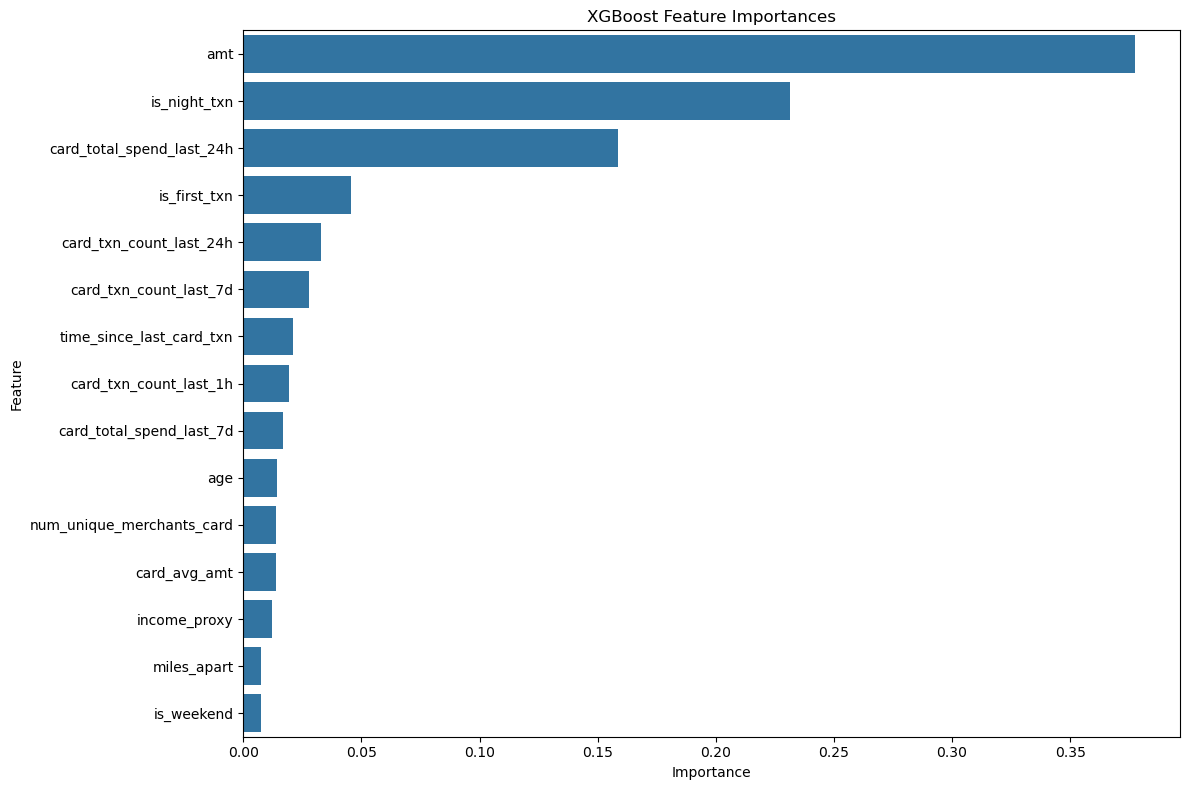

In [121]:
feature_importances = xgb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

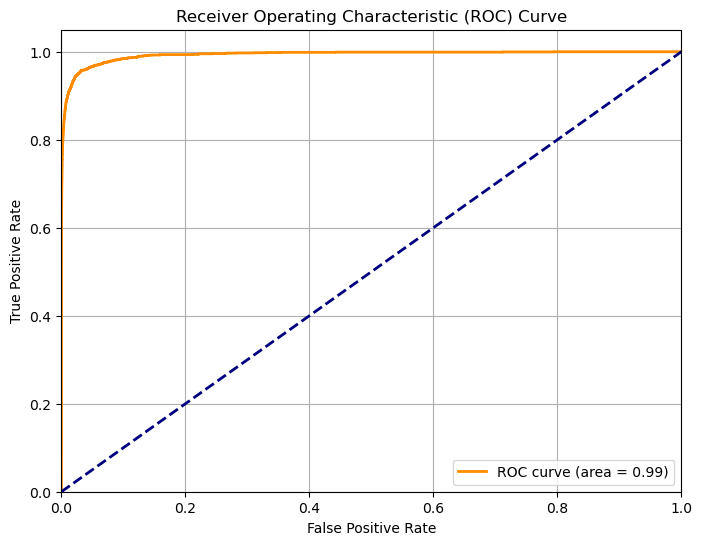

ROC AUC Score for XGBoost on Test Set: 0.9931


In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for XGBoost on Test Set: {roc_auc:.4f}") 

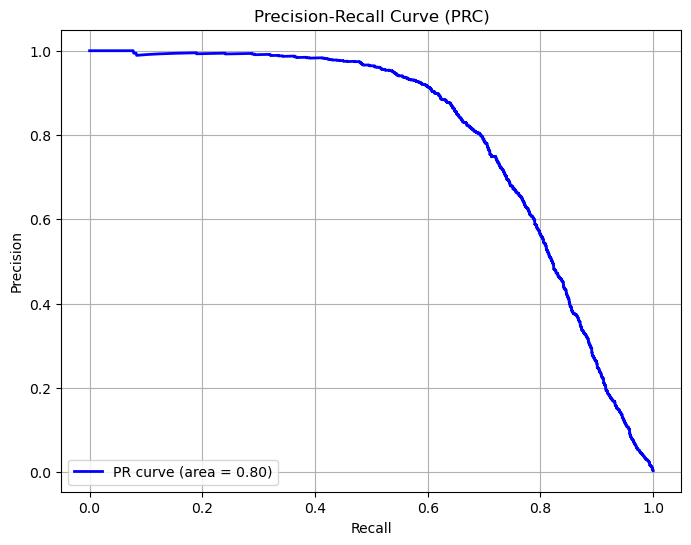

PR AUC Score for XGBoost on Test Set: 0.7953


In [123]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"PR AUC Score for XGBoost on Test Set: {pr_auc:.4f}")